In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from cbrain.imports import *
from cbrain.utils import *
from cbrain.model_diagnostics import *

/export/home/srasp/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
limit_mem()

In [4]:
# UCI
model_dir = '/export/home/srasp/repositories/CBRAIN-CAM/saved_models/'
pre_dir = '/scratch/srasp/preprocessed_data/'

In [4]:
# LMU
model_dir = '/home/s/S.Rasp/repositories/CBRAIN-CAM/saved_models/'
pre_dir = '/local/S.Rasp/preprocessed_data/'

In [5]:
def get_stats(model_name, pref, norms=(None, None, None, None), trn_val='valid', compute_stats=True,
              sample='sample1', convo=False, convo_tile=False):
    model_path = model_dir + model_name + '.h5'
    diag = ModelDiagnostics(model_path, 
                    fpath=f'{pre_dir}{pref}_{trn_val}_{sample}_features.nc',
                    tpath=f'{pre_dir}{pref}_{trn_val}_{sample}_targets.nc',
                    npath=f'{pre_dir}{pref}_train_{sample}_norm.nc',
                    norms=norms, convo=convo, convo_tile=convo_tile)
    if compute_stats:
        diag.compute_stats()
        print(diag.mean_stats(9))
    return diag

In [6]:
sst_valids = [
    'fbp_engy_ess_ref_valid',
    'fbp_engy_ess_1k_valid',
    'fbp_engy_ess_2k_valid',
    'fbp_engy_ess_3k_valid',
    'fbp_engy_ess_4k_valid',
]
sst_valids = [
    'fbp_engy_ess_ref_valid',
#     'fbp_engy_ess_1k_valid',
#     'fbp_engy_ess_2k_valid',
#     'fbp_engy_ess_3k_valid',
#     'fbp_engy_ess_4k_valid',
]

In [7]:
def get_sst_stats(model_name, norm_file, norms, convo=False, convo_tile=False):
    model_path = model_dir + model_name + '.h5'
    diags = [ModelDiagnostics(
        model_path, fpath=f'{pre_dir}{v}_features.nc', tpath=f'{pre_dir}{v}_targets.nc',
        npath=f'{pre_dir}{norm_file}', norms=norms, convo=convo, convo_tile=convo_tile) for v in sst_valids]
    for d in diags:
        try: d.load_stats()
        except: d.compute_stats(); d.save_stats()
    return diags

In [8]:
norms = ('feature_means', 'max_rs', None, 'target_conv')

In [9]:
diags = {}

## Review

In [13]:
d = get_stats('E001_fullphy_fbp_sample1_max_rs_deep', 'fullphy_fbp', norms=norms,
              sample='fullyear', compute_stats='False')

100%|██████████| 2868/2868 [02:38<00:00, 18.09it/s]


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND  2.49632e-06  1.87435e-09  2.47394e-06 -2.23739e-08  1.67994e-09   
PHQ      -1.55495e-09   2.0548e-15    -5.05e-10  1.04995e-09   7.6938e-16   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.09948e-09  1.36946e-09  2.95515e-09  0.184501  3.09948e-09   
PHQ       2.47541e-15  5.96053e-16  2.42379e-15  -9.15611  2.47541e-15   
all               NaN          NaN          NaN       NaN          NaN   

            hor_tmean      hor_mse     hor_tvar    hor_r2  
TPHYSTND -2.23739e-08  1.87435e-09  3.08073e-09  0.395641  
PHQ       1.04995e-09   2.0548e-15  2.46441e-15  0.382884  
all               NaN          NaN          NaN  0.389263  


/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [22]:
diags['D025_fbp_engy_ess_ref_fullyear_ref_longtrain'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,9.75409e-09,1.31152e-09,3.01472e-07,2.91718e-07,1.88914e-09,3.19543e-09,1.7263e-09,3.03139e-09,0.471546,3.19543e-09,2.91718e-07,1.31152e-09,3.17483e-09,0.570058
PHQ,-1.57661e-11,1.67831e-15,1.09767e-09,1.11344e-09,8.44898e-16,2.51426e-15,7.86017e-16,2.45547e-15,-5.5119,2.51426e-15,1.11344e-09,1.67831e-15,2.50224e-15,0.517701
FSNT,-0.326526,668.448,230.487,230.814,158058,159136,83137.8,83994.2,-inf,159136,230.814,668.448,105861,0.993686
FSNS,-0.398883,827.738,163.396,163.795,88287.4,89468.4,49329.8,50318,-inf,89468.4,163.795,827.738,62639.7,0.986786
FLNT,0.07663,118.617,222.572,222.495,51565.8,51641.6,1215.49,1322.3,0.883514,51641.6,222.495,118.617,2137.58,0.944509
FLNS,-0.16283,82.0001,52.2949,52.4577,3419.54,3519.26,549.55,628.439,0.846475,3519.26,52.4577,82.0001,767.446,0.893152
PRECT,5.39478e-11,1.36628e-15,3.162e-08,3.1566e-08,1.23344e-14,1.37268e-14,9.93888e-15,1.13301e-14,0.694858,1.37268e-14,3.1566e-08,1.36628e-15,1.27304e-14,0.892676
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828367


In [25]:
diags['D033_fbp_engy_ess_ref_fullyear_ref_gentine'] = \
    get_sst_stats('D033_fbp_engy_ess_ref_fullyear_ref_gentine', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [01:38<00:00, 17.37it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [26]:
diags['D033_fbp_engy_ess_ref_fullyear_ref_gentine'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,-7.70988e-09,1.26409e-09,2.84009e-07,2.91718e-07,1.94129e-09,3.19543e-09,1.77754e-09,3.03139e-09,0.511452,3.19543e-09,2.91718e-07,1.26409e-09,3.17483e-09,0.601843
PHQ,-1.28469e-11,1.65932e-15,1.10059e-09,1.11344e-09,8.64643e-16,2.51426e-15,8.05405e-16,2.45547e-15,-6.83004,2.51426e-15,1.11344e-09,1.65932e-15,2.50224e-15,0.527233
FSNT,-0.349073,624.756,230.464,230.814,158116,159136,83202.5,83994.2,-inf,159136,230.814,624.756,105861,0.994098
FSNS,-0.378161,773.735,163.417,163.795,88386.9,89468.4,49416.5,50318,-inf,89468.4,163.795,773.735,62639.7,0.987648
FLNT,0.0390591,93.5818,222.534,222.495,51569.1,51641.6,1236.48,1322.3,0.906363,51641.6,222.495,93.5818,2137.58,0.956221
FLNS,-0.168095,74.3297,52.2896,52.4577,3424.44,3519.26,554.395,628.439,0.861612,3519.26,52.4577,74.3297,767.446,0.903147
PRECT,7.6588e-11,1.32645e-15,3.16426e-08,3.1566e-08,1.24233e-14,1.37268e-14,1.00164e-14,1.13301e-14,0.705228,1.37268e-14,3.1566e-08,1.32645e-15,1.27304e-14,0.895805
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.837999


In [27]:
diags['D034_fbp_engy_ess_ref_fullyear_ref_smaller'] = \
    get_sst_stats('D034_fbp_engy_ess_ref_fullyear_ref_smaller', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [00:58<00:00, 29.52it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [28]:
diags['D034_fbp_engy_ess_ref_fullyear_ref_smaller'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,2.68641e-08,1.342e-09,3.18583e-07,2.91718e-07,1.86117e-09,3.19543e-09,1.69669e-09,3.03139e-09,0.440541,3.19543e-09,2.91718e-07,1.342e-09,3.17483e-09,0.567361
PHQ,-3.55379e-11,1.69794e-15,1.0779e-09,1.11344e-09,8.21145e-16,2.51426e-15,7.62491e-16,2.45547e-15,-14.1803,2.51426e-15,1.11344e-09,1.69794e-15,2.50224e-15,0.510756
FSNT,-0.536615,730.387,230.277,230.814,157867,159136,83043.5,83994.2,-inf,159136,230.814,730.387,105861,0.993101
FSNS,-0.488321,908.493,163.306,163.795,88130.9,89468.4,49198.8,50318,-inf,89468.4,163.795,908.493,62639.7,0.985497
FLNT,-0.0165837,122.546,222.478,222.495,51516.7,51641.6,1210.26,1322.3,0.875594,51641.6,222.495,122.546,2137.58,0.942671
FLNS,-0.188482,91.4375,52.2692,52.4577,3404.38,3519.26,539.112,628.439,0.830488,3519.26,52.4577,91.4375,767.446,0.880855
PRECT,4.65657e-11,1.41523e-15,3.16126e-08,3.1566e-08,1.23338e-14,1.37268e-14,9.92967e-15,1.13301e-14,0.676584,1.37268e-14,3.1566e-08,1.41523e-15,1.27304e-14,0.888831
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824153


In [18]:
diags['D037_fbp_engy_ess_ref_fullyear_ref_tiny'] = \
    get_sst_stats('D037_fbp_engy_ess_ref_fullyear_ref_tiny', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [00:51<00:00, 33.25it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [19]:
diags['D037_fbp_engy_ess_ref_fullyear_ref_tiny'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,5.25755e-09,1.43416e-09,2.96976e-07,2.91718e-07,1.7604e-09,3.19543e-09,1.59724e-09,3.03139e-09,0.375805,3.19543e-09,2.91718e-07,1.43416e-09,3.17483e-09,0.535598
PHQ,-6.91392e-11,1.75299e-15,1.0443e-09,1.11344e-09,7.62736e-16,2.51426e-15,7.05126e-16,2.45547e-15,-25.8869,2.51426e-15,1.11344e-09,1.75299e-15,2.50224e-15,0.490957
FSNT,-0.830845,910.011,229.983,230.814,157456,159136,82810.7,83994.2,-inf,159136,230.814,910.011,105861,0.991404
FSNS,-0.77104,1139.73,163.024,163.795,87756.5,89468.4,48933.9,50318,-inf,89468.4,163.795,1139.73,62639.7,0.981805
FLNT,0.00593316,151.235,222.501,222.495,51491.8,51641.6,1179.08,1322.3,0.849046,51641.6,222.495,151.235,2137.58,0.929249
FLNS,-0.283444,125.285,52.1742,52.4577,3363.52,3519.26,505.335,628.439,0.766499,3519.26,52.4577,125.285,767.446,0.83675
PRECT,-1.27637e-11,1.54132e-15,3.15533e-08,3.1566e-08,1.21374e-14,1.37268e-14,9.75077e-15,1.13301e-14,0.643001,1.37268e-14,3.1566e-08,1.54132e-15,1.27304e-14,0.878926
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.806384


In [23]:
diags['D038_fbp_engy_ess_ref_fullyear_ref_shallow'] = \
    get_sst_stats('D038_fbp_engy_ess_ref_fullyear_ref_shallow', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [01:06<00:00, 25.66it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [24]:
diags['D038_fbp_engy_ess_ref_fullyear_ref_shallow'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,-9.79515e-11,1.63022e-09,2.9162e-07,2.91718e-07,1.56755e-09,3.19543e-09,1.40169e-09,3.03139e-09,0.279751,3.19543e-09,2.91718e-07,1.63022e-09,3.17483e-09,0.475691
PHQ,-1.01888e-10,1.86155e-15,1.01155e-09,1.11344e-09,6.51127e-16,2.51426e-15,5.92623e-16,2.45547e-15,-27.4051,2.51426e-15,1.11344e-09,1.86155e-15,2.50224e-15,0.456445
FSNT,0.0241869,1362.5,230.838,230.814,157503,159136,82436.5,83994.2,-inf,159136,230.814,1362.5,105861,0.987129
FSNS,0.586019,1718.89,164.381,163.795,87629,89468.4,48391.7,50318,-inf,89468.4,163.795,1718.89,62639.7,0.972559
FLNT,0.0675135,250.818,222.563,222.495,51431.6,51641.6,1083.49,1322.3,0.745547,51641.6,222.495,250.818,2137.58,0.882663
FLNS,-0.44615,154.744,52.0115,52.4577,3309.88,3519.26,472.124,628.439,0.724643,3519.26,52.4577,154.744,767.446,0.798365
PRECT,1.10714e-10,1.97911e-15,3.16767e-08,3.1566e-08,1.17247e-14,1.37268e-14,9.3358e-15,1.13301e-14,0.52579,1.37268e-14,3.1566e-08,1.97911e-15,1.27304e-14,0.844537
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.773913


In [12]:
diags['D035_fbp_engy_ess_ref_fullyear_ref_big_fluxes'] = \
    get_sst_stats('D035_fbp_engy_ess_ref_fullyear_ref_big_fluxes', 'fbp_engy_ess_ref_train_sample1_norm_big_fluxes.nc', norms)

100%|██████████| 1716/1716 [01:07<00:00, 25.37it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [13]:
diags['D035_fbp_engy_ess_ref_fullyear_ref_big_fluxes'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,-2.89022e-08,1.37268e-09,2.62816e-07,2.91718e-07,1.83153e-09,3.19543e-09,1.66803e-09,3.03139e-09,0.4376,3.19543e-09,2.91718e-07,1.37268e-09,3.17483e-09,0.55319
PHQ,7.07239e-13,1.73625e-15,1.11415e-09,1.11344e-09,7.84664e-16,2.51426e-15,7.25367e-16,2.45547e-15,-14.7969,2.51426e-15,1.11344e-09,1.73625e-15,2.50224e-15,0.498118
FSNT,-0.234469,638.243,230.579,230.814,158210,159136,83203.1,83994.2,-inf,159136,230.814,638.243,105861,0.993971
FSNS,-0.210021,794.549,163.585,163.795,88499.1,89468.4,49434.5,50318,-inf,89468.4,163.795,794.549,62639.7,0.987316
FLNT,0.170308,89.7129,222.665,222.495,51619.4,51641.6,1236.51,1322.3,0.911495,51641.6,222.495,89.7129,2137.58,0.958031
FLNS,-0.087257,75.6783,52.3704,52.4577,3437.3,3519.26,555.586,628.439,0.861225,3519.26,52.4577,75.6783,767.446,0.901389
PRECT,3.79596e-11,1.36766e-15,3.1604e-08,3.1566e-08,1.23903e-14,1.37268e-14,9.984e-15,1.13301e-14,0.69598,1.37268e-14,3.1566e-08,1.36766e-15,1.27304e-14,0.892568
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826369


In [21]:
diags['D036_fbp_engy_ess_ref_fullyear_ref_small_fluxes'] = \
    get_sst_stats('D036_fbp_engy_ess_ref_fullyear_ref_small_fluxes', 'fbp_engy_ess_ref_train_sample1_norm_small_fluxes.nc', norms)

100%|██████████| 1716/1716 [01:22<00:00, 20.84it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [22]:
diags['D036_fbp_engy_ess_ref_fullyear_ref_small_fluxes'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,6.10806e-08,1.31553e-09,3.52799e-07,2.91718e-07,1.89672e-09,3.19543e-09,1.73227e-09,3.03139e-09,0.467227,3.19543e-09,2.91718e-07,1.31553e-09,3.17483e-09,0.565948
PHQ,-3.4976e-11,1.67791e-15,1.07846e-09,1.11344e-09,8.44366e-16,2.51426e-15,7.85599e-16,2.45547e-15,-5.14241,2.51426e-15,1.11344e-09,1.67791e-15,2.50224e-15,0.514923
FSNT,0.0545532,884.574,230.868,230.814,158160,159136,83195.9,83994.2,-inf,159136,230.814,884.574,105861,0.991644
FSNS,-0.154159,1062.53,163.641,163.795,88193.6,89468.4,49219,50318,-inf,89468.4,163.795,1062.53,62639.7,0.983037
FLNT,-0.00761472,181.124,222.487,222.495,51471.5,51641.6,1171.44,1322.3,0.822835,51641.6,222.495,181.124,2137.58,0.915267
FLNS,-0.182358,115.94,52.2753,52.4577,3384.26,3519.26,522.679,628.439,0.766944,3519.26,52.4577,115.94,767.446,0.848928
PRECT,9.43075e-11,1.43038e-15,3.16603e-08,3.1566e-08,1.23584e-14,1.37268e-14,9.95642e-15,1.13301e-14,0.676507,1.37268e-14,3.1566e-08,1.43038e-15,1.27304e-14,0.887641
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.815341


In [27]:
diags['D039_fbp_engy_ess_ref_fullyear_ref_small_fluxes2'] = \
    get_sst_stats('D039_fbp_engy_ess_ref_fullyear_ref_small_fluxes2', 'fbp_engy_ess_ref_train_sample1_norm_small_fluxes2.nc', norms)

100%|██████████| 1716/1716 [01:20<00:00, 21.21it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [28]:
diags['D039_fbp_engy_ess_ref_fullyear_ref_small_fluxes2'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,4.00495e-08,1.31709e-09,3.31768e-07,2.91718e-07,1.88927e-09,3.19543e-09,1.72563e-09,3.03139e-09,0.460807,3.19543e-09,2.91718e-07,1.31709e-09,3.17483e-09,0.563409
PHQ,-4.67151e-11,1.6783e-15,1.06673e-09,1.11344e-09,8.44046e-16,2.51426e-15,7.85753e-16,2.45547e-15,-4.22387,2.51426e-15,1.11344e-09,1.6783e-15,2.50224e-15,0.514013
FSNT,-0.302245,781.811,230.511,230.814,157936,159136,83092.4,83994.2,-inf,159136,230.814,781.811,105861,0.992615
FSNS,-0.45218,954.654,163.343,163.795,88117.4,89468.4,49218.6,50318,-inf,89468.4,163.795,954.654,62639.7,0.98476
FLNT,-0.00265003,162.456,222.492,222.495,51481,51641.6,1181.51,1322.3,0.840719,51641.6,222.495,162.456,2137.58,0.924
FLNS,-0.191542,100.514,52.2661,52.4577,3399.47,3519.26,536.639,628.439,0.804313,3519.26,52.4577,100.514,767.446,0.869028
PRECT,1.11203e-10,1.41473e-15,3.16772e-08,3.1566e-08,1.23458e-14,1.37268e-14,9.94448e-15,1.13301e-14,0.682999,1.37268e-14,3.1566e-08,1.41473e-15,1.27304e-14,0.88887
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819528


In [16]:
diags['D025_fbp_engy_ess_ref_fullyear_ref_longtrain'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,9.75409e-09,1.31152e-09,3.01472e-07,2.91718e-07,1.88914e-09,3.19543e-09,1.7263e-09,3.03139e-09,0.471546,3.19543e-09,2.91718e-07,1.31152e-09,3.17483e-09,0.570058
PHQ,-1.57661e-11,1.67831e-15,1.09767e-09,1.11344e-09,8.44898e-16,2.51426e-15,7.86017e-16,2.45547e-15,-5.5119,2.51426e-15,1.11344e-09,1.67831e-15,2.50224e-15,0.517701
FSNT,-0.326526,668.448,230.487,230.814,158058,159136,83137.8,83994.2,-inf,159136,230.814,668.448,105861,0.993686
FSNS,-0.398883,827.738,163.396,163.795,88287.4,89468.4,49329.8,50318,-inf,89468.4,163.795,827.738,62639.7,0.986786
FLNT,0.07663,118.617,222.572,222.495,51565.8,51641.6,1215.49,1322.3,0.883514,51641.6,222.495,118.617,2137.58,0.944509
FLNS,-0.16283,82.0001,52.2949,52.4577,3419.54,3519.26,549.55,628.439,0.846475,3519.26,52.4577,82.0001,767.446,0.893152
PRECT,5.39478e-11,1.36628e-15,3.162e-08,3.1566e-08,1.23344e-14,1.37268e-14,9.93888e-15,1.13301e-14,0.694858,1.37268e-14,3.1566e-08,1.36628e-15,1.27304e-14,0.892676
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828367


## SSTs

In [15]:
diags['D004_fbp_engy_ess_fullyear_max_rs_deep'] = \
    get_sst_stats('D004_fbp_engy_ess_fullyear_max_rs_deep', 'fbp_engy_ess_train_fullyear_norm.nc', norms)

In [16]:
diags['D015_fbp_engy_ess_sample1_dr02'] = \
    get_sst_stats('D015_fbp_engy_ess_sample1_dr02', 'fbp_engy_ess_train_sample1_norm.nc', norms)

In [17]:
diags['D014_fbp_engy_ess_sample1_bn'] = \
    get_sst_stats('D014_fbp_engy_ess_sample1_bn', 'fbp_engy_ess_train_sample1_norm.nc', norms)

In [18]:
diags['D016_fbp_engy_ess_sample1_shallow'] = \
    get_sst_stats('D016_fbp_engy_ess_sample1_shallow', 'fbp_engy_ess_train_sample1_norm.nc', norms)

In [21]:
diags['D017_fbp_engy_ess_sample1_conv1'] = \
    get_sst_stats('D017_fbp_engy_ess_sample1_conv1', 'fbp_engy_ess_train_sample1_norm.nc', norms, convo=True)

100%|██████████| 1716/1716 [01:15<00:00, 22.79it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:17<00:00, 22.18it/s]


In [12]:
diags['D022_fbp_engy_ess_ref_4k'] = \
    get_sst_stats('D022_fbp_engy_ess_ref_4k', 'fbp_engy_ess_ref_4k_sample1_train_norm.nc', norms)

100%|██████████| 1716/1716 [01:07<00:00, 25.55it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:10<00:00, 24.31it/s]


In [24]:
diags['D020_fbp_engy_ess_ref_fullyear_ref'] = \
    get_sst_stats('D020_fbp_engy_ess_ref_fullyear_ref', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [01:26<00:00, 19.90it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:22<00:00, 20.85it/s]


In [25]:
diags['D019_fbp_engy_ess_ref_6m_ref'] = \
    get_sst_stats('D019_fbp_engy_ess_ref_6m_ref', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [01:13<00:00, 23.22it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:14<00:00, 22.91it/s]


In [26]:
diags['D018_fbp_engy_ess_ref_3m_ref'] = \
    get_sst_stats('D018_fbp_engy_ess_ref_3m_ref', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [01:18<00:00, 21.93it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:18<00:00, 21.93it/s]


In [27]:
diags['D021_fbp_engy_ess_ref_sample1_ref'] = \
    get_sst_stats('D021_fbp_engy_ess_ref_sample1_ref', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [01:22<00:00, 20.80it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:25<00:00, 20.02it/s]


In [45]:
diags['D023_fbp_engy_ess_ref_fullyear_dr02'] = \
    get_sst_stats('D023_fbp_engy_ess_ref_fullyear_dr02', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [01:38<00:00, 17.44it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:22<00:00, 20.91it/s]


In [51]:
diags['D024_fbp_engy_ess_ref_4k_fullyear_ref'] = \
    get_sst_stats('D024_fbp_engy_ess_ref_4k_fullyear_ref', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [01:43<00:00, 16.55it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:42<00:00, 16.68it/s]


In [15]:
diags['D025_fbp_engy_ess_ref_fullyear_ref_longtrain'] = \
    get_sst_stats('D025_fbp_engy_ess_ref_fullyear_ref_longtrain', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

In [15]:
diags['D025_fbp_engy_ess_ref_fullyear_ref_longtrain'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,9.75409e-09,1.31152e-09,3.01472e-07,2.91718e-07,1.88914e-09,3.19543e-09,1.7263e-09,3.03139e-09,0.471546,3.19543e-09,2.91718e-07,1.31152e-09,3.17483e-09,0.570058
PHQ,-1.57661e-11,1.67831e-15,1.09767e-09,1.11344e-09,8.44898e-16,2.51426e-15,7.86017e-16,2.45547e-15,-5.5119,2.51426e-15,1.11344e-09,1.67831e-15,2.50224e-15,0.517701
FSNT,-0.326526,668.448,230.487,230.814,158058,159136,83137.8,83994.2,-inf,159136,230.814,668.448,105861,0.993686
FSNS,-0.398883,827.738,163.396,163.795,88287.4,89468.4,49329.8,50318,-inf,89468.4,163.795,827.738,62639.7,0.986786
FLNT,0.07663,118.617,222.572,222.495,51565.8,51641.6,1215.49,1322.3,0.883514,51641.6,222.495,118.617,2137.58,0.944509
FLNS,-0.16283,82.0001,52.2949,52.4577,3419.54,3519.26,549.55,628.439,0.846475,3519.26,52.4577,82.0001,767.446,0.893152
PRECT,5.39478e-11,1.36628e-15,3.162e-08,3.1566e-08,1.23344e-14,1.37268e-14,9.93888e-15,1.13301e-14,0.694858,1.37268e-14,3.1566e-08,1.36628e-15,1.27304e-14,0.892676
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828367


In [48]:
diags['D026_fbp_engy_ess_ref_fullyear_newdr01'] = \
    get_sst_stats('D026_fbp_engy_ess_ref_fullyear_newdr01', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [01:27<00:00, 19.62it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:26<00:00, 19.87it/s]


In [23]:
diags['D027_fbp_engy_ess_sample1_conv1_bn'] = \
    get_sst_stats('D027_fbp_engy_ess_sample1_conv1_bn', 'fbp_engy_ess_train_sample1_norm.nc', norms, convo=True)

100%|██████████| 1716/1716 [01:21<00:00, 21.16it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:22<00:00, 20.74it/s]


In [24]:
diags['D028_fbp_engy_ess_ref_sample1_bottleneck'] = \
    get_sst_stats('D028_fbp_engy_ess_ref_sample1_bottleneck', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

100%|██████████| 1716/1716 [00:50<00:00, 34.29it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/17

In [25]:
diags['D029_fbp_engy_ess_sample1_conv_tile1'] = \
    get_sst_stats('D029_fbp_engy_ess_sample1_conv_tile1', 'fbp_engy_ess_train_sample1_norm.nc', norms, convo_tile=True)

100%|██████████| 1716/1716 [01:49<00:00, 15.74it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:26<00:00, 19.77it/s]


In [31]:
diags['D030_fbp_engy_ess_ref_1k_sample1_ref'] = \
    get_sst_stats('D030_fbp_engy_ess_ref_1k_sample1_ref', 'fbp_engy_ess_ref_1k_sample1_train_norm.nc', norms)

100%|██████████| 1716/1716 [01:15<00:00, 22.58it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
100%|██████████| 1716/1716 [01:18<00:00, 21.81it/s]


In [32]:
def bar_generalization(diags, func=lambda d: d.mean_stats(10)['hor_r2']['TPHYSTND']):
    scores = {k: func(d[0]) for k, d in diags.items()}
    sns.barplot(y=list(scores.keys()), x=list(scores.values()))

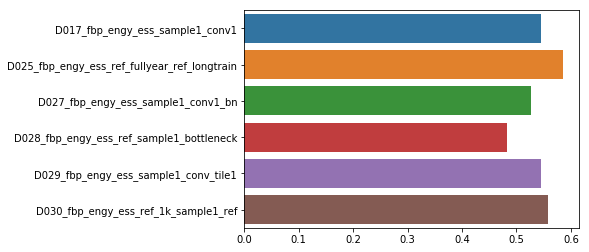

In [33]:
bar_generalization(diags)

In [34]:
def plot_generalization(diags, func=lambda d: d.mean_stats(10)['hor_r2']['TPHYSTND']):
    for k, diags in diags.items():
        plt.plot([func(d) for d in diags], label=k)
    plt.legend()

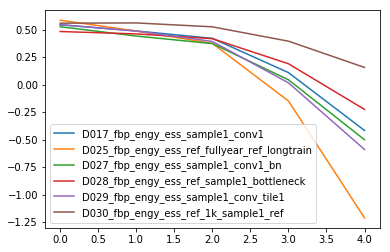

In [35]:
plot_generalization(diags)

In [57]:
diags['D026_fbp_engy_ess_ref_fullyear_newdr01', 'D025_fbp_engy_ess_ref_fullyear_ref_longtrain']

KeyError: ('D026_fbp_engy_ess_ref_fullyear_newdr01', 'D025_fbp_engy_ess_ref_fullyear_ref_longtrain')

In [59]:
sorted(diags.keys())

['D004_fbp_engy_ess_fullyear_max_rs_deep',
 'D014_fbp_engy_ess_sample1_bn',
 'D015_fbp_engy_ess_sample1_dr02',
 'D016_fbp_engy_ess_sample1_shallow',
 'D017_fbp_engy_ess_sample1_conv1',
 'D018_fbp_engy_ess_ref_3m_ref',
 'D019_fbp_engy_ess_ref_6m_ref',
 'D020_fbp_engy_ess_ref_fullyear_ref',
 'D021_fbp_engy_ess_ref_sample1_ref',
 'D022_fbp_engy_ess_ref_4k',
 'D023_fbp_engy_ess_ref_fullyear_dr02',
 'D024_fbp_engy_ess_ref_4k_fullyear_ref',
 'D025_fbp_engy_ess_ref_fullyear_ref_longtrain',
 'D026_fbp_engy_ess_ref_fullyear_newdr01']

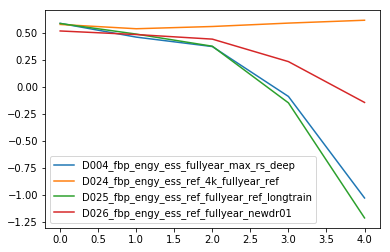

In [62]:
plot_generalization({k: diags[k] for k in 
    ['D004_fbp_engy_ess_fullyear_max_rs_deep', 'D024_fbp_engy_ess_ref_4k_fullyear_ref', 
     'D025_fbp_engy_ess_ref_fullyear_ref_longtrain', 'D026_fbp_engy_ess_ref_fullyear_newdr01']})

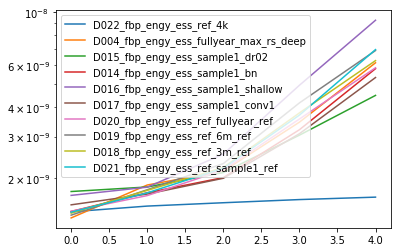

In [30]:
plot_generalization(diags, func=lambda d: d.mean_stats(10)['mse']['TPHYSTND'])
plt.yscale('log')

## Review tests

In [10]:
diags['D033_fbp_engy_ess_ref_fullyear_ref_gentine'] = \
    get_sst_stats('D033_fbp_engy_ess_ref_fullyear_ref_gentine', 'fbp_engy_ess_ref_train_sample1_norm.nc', norms)

OSError: Unable to open file (unable to open file: name = '/local/S.Rasp/preprocessed_data/fbp_engy_ess_ref_valid_features.nc', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

## Sensitive dependence on IC

In [37]:
d = diags['D025_fbp_engy_ess_ref_fullyear_ref_longtrain'][0]

(<Figure size 864x360 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x2b17b513ce10>,
       dtype=object))

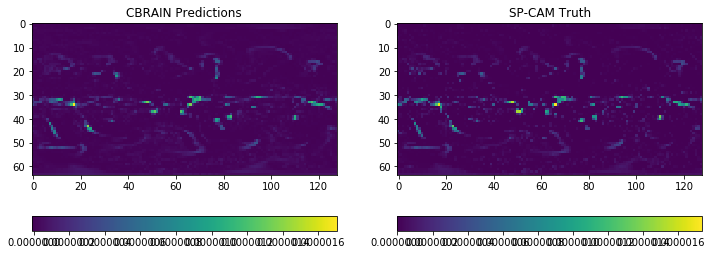

In [39]:
d.plot_double_xy(0, 0, 'PRECT')

In [43]:
??d._get_k_pt

In [58]:
def get_f(d, itime):
    f = (d.k_features['features'][itime*d.ngeo:(itime+1)*d.ngeo] -
             d.fsub) / d.fdiv
    return f

def get_p(d, f, var=None):

    p = d.model.predict_on_batch(f) / d.tmult + d.tsub
    #t = d.k_targets['targets'][itime*d.ngeo:(itime+1)*d.ngeo]
    # At this stage they have shape [ngeo, stacked_levs]
    return d._k_reshape(p, var)

In [56]:
f = get_f(d, 0); f.shape

(8192, 94)

In [63]:
f_re = d._k_reshape(f); f_re.shape

(64, 128, 94)

In [60]:
p = get_p(d, f, 'PRECT'); p.shape

(64, 128, 1)

In [71]:
ilon = 17; ilat = 34

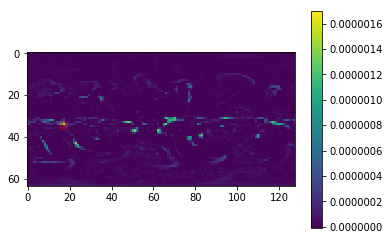

In [72]:
plt.imshow(p.squeeze()); plt.colorbar(); 
plt.scatter(ilon, ilat, s=70, c='r', alpha=0.3);

In [164]:
f_std = f_re[29:35, :].reshape(-1, 94).std(0)

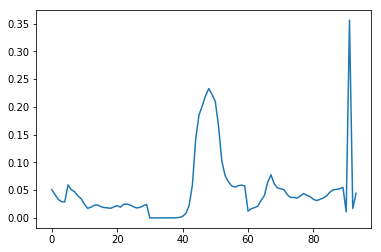

In [165]:
plt.plot(f_std);

In [166]:
f_perts = [f_re[ilat, ilon] + np.random.normal(0, f_std*0.1, 94) for i in range(5)]
f_perts = np.array(f_perts); f_perts.shape

(5, 94)

In [167]:
p_perts = d.model.predict_on_batch(f_perts) / d.tmult + d.tsub; p_pert.shape

(5, 65)

In [168]:
d.tvars

['TPHYSTND', 'PHQ', 'FSNT', 'FSNS', 'FLNT', 'FLNS', 'PRECT']

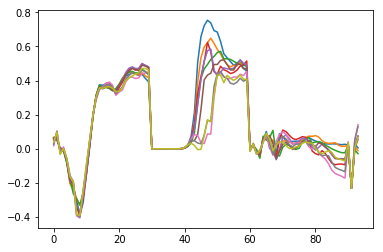

In [169]:
plt.plot(f_re[ilat:ilat+3, ilon:ilon+3].reshape(-1, 94).T);

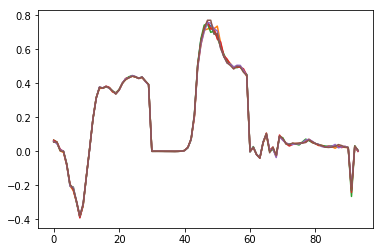

In [170]:
plt.plot(f_re[ilat, ilon])
[plt.plot(f_perts[i]) for i in range(f_perts.shape[0])];

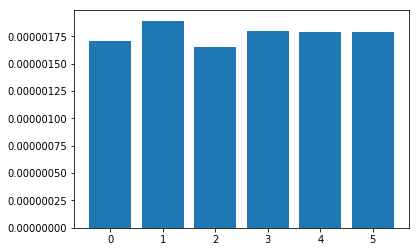

In [171]:
plt.bar(range(p_perts.shape[0]+1), [p[ilat, ilon]] + list(p_perts[:, -1]));

## Permutation importance

In [121]:
%%time
f_full = d.k_features['features'][:]

CPU times: user 0 ns, sys: 22 s, total: 22 s
Wall time: 16.7 s


In [123]:
f_norm = (f_full - d.fsub) / d.fdiv

In [124]:
%%time
t_full = d.k_targets['targets'][:]

CPU times: user 0 ns, sys: 33.8 s, total: 33.8 s
Wall time: 32.8 s


In [128]:
t_norm = t_full * d.tmult

In [129]:
f_norm.shape, t_norm.shape

((14057472, 94), (14057472, 65))

In [134]:
%%time
d.model.evaluate(f_norm, t_norm, 100_000)

14057472/14057472 [==============================] - 39s 3us/step
CPU times: user 43 s, sys: 0 ns, total: 43 s
Wall time: 38.9 s


[0.004886302234664519,
 0.04978594795736568,
 -1.4734431767042744,
 0.6237459956673201,
 0.004886302234664519,
 2.3788481220086037e-05]

In [135]:
d.model.metrics

['rmse', 'log_loss', 'var_ratio', 'mean_squared_error', 'var_loss']

In [179]:
f_norm.reshape(d.nlat, d.nlon, -1, 94).shape

(64, 128, 1716, 94)

In [210]:
# Only in the tropics
tropics = np.zeros((d.nlat, d.nlon, 1716), 'bool')
tropics[30:34, :, :250] = 1
tropics = tropics.flatten()
tropics.shape, tropics.sum()

((14057472,), 128000)

In [218]:
def prec_mse(m, f, t):
    p_prec = m.predict(f, 100_000, 0)[:, -1]
    t_prec = t[:, -1]
    mse = ((p_prec - t_prec)**2).mean()
    return mse

In [212]:
def eval_shuf(m, idx, sl, prec=False):
    x_shuf = f_norm[sl, :].copy()
    x_shuf[:, idx] = np.random.permutation(x_shuf[:, idx])
    if prec:
        score = prec_mse(m, x_shuf, t_norm[sl, :])
    else:
        score = m.evaluate(x_shuf, t_norm[sl, :], 100_000, 0)[0]
    return score

In [213]:
n_f = f_norm.shape[1]; n_f

94

In [214]:
def perm_imp(m, sl, prec=False):
    if prec:
        ref_score = prec_mse(m, f_norm[sl, :], t_norm[sl, :])
    else:
        ref_score = m.evaluate(f_norm[sl, :], t_norm[sl, :], 100_000, 0)[0]
    scores = []
    for i in tqdm(range(n_f)):
        scores.append(eval_shuf(m, i, sl, prec))
    fimp = np.array(scores) - ref_score
    df = pd.DataFrame(columns=['Feature', 'Importance'])
    df['Feature'] = d.k_norm['feature_names'][:]; df['Importance'] = fimp
    return df

In [223]:
df = perm_imp(d.model, tropics)

100%|██████████| 94/94 [00:56<00:00,  1.66it/s]


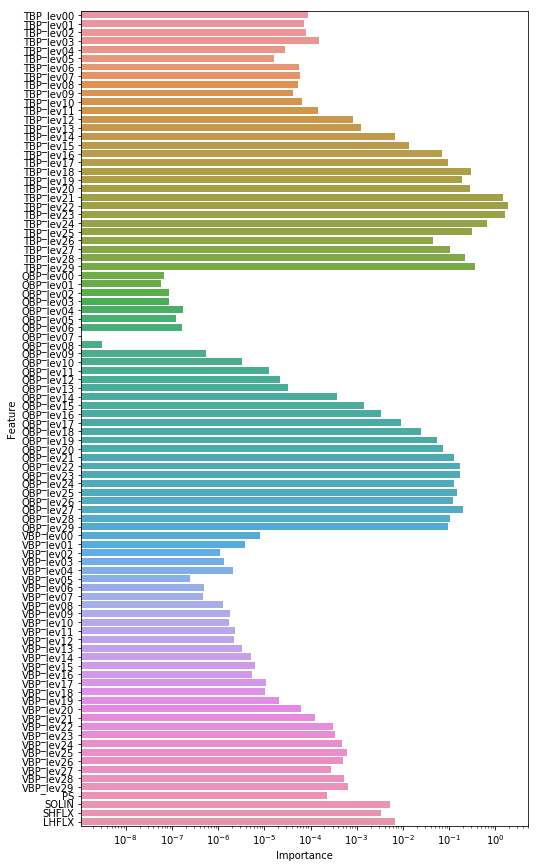

In [226]:
fig, ax = plt.subplots(figsize=(8, 15))
sns.barplot(data=df, x='Importance', y='Feature', ax=ax)
#plt.xticks(rotation=90);
plt.xscale('log')

In [219]:
df = perm_imp(d.model, tropics, prec=True)

100%|██████████| 94/94 [00:52<00:00,  1.80it/s]


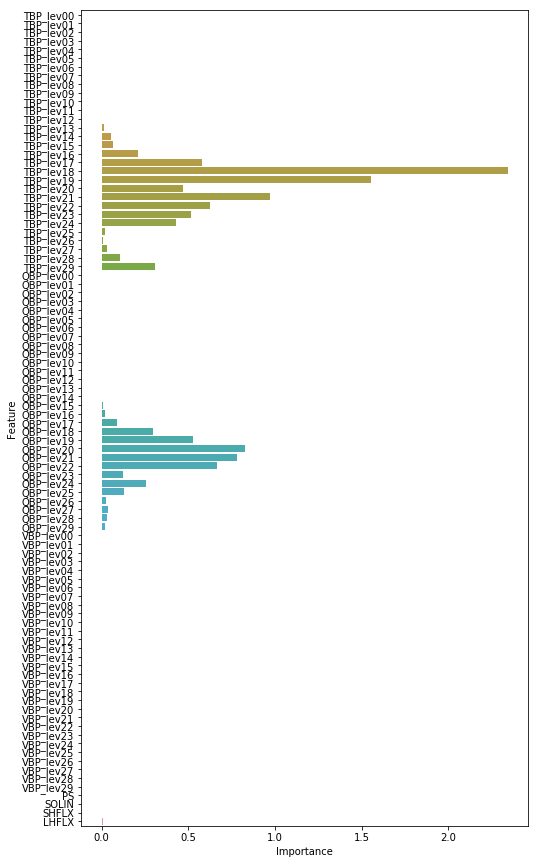

In [222]:
fig, ax = plt.subplots(figsize=(8, 15))
sns.barplot(data=df, x='Importance', y='Feature', ax=ax)
#plt.xticks(rotation=90);

My problem with these plots is:
- The scores are absolutely awful, meaning that we are perturbing way outsie a reasonable range
- Positive: it shows that some variables (VBP) are not particularly important, so could be a nice additiona to the paper
- Still doesn't tell me what a reasonable perturbation range would be for sensitivity to IC experiment 

## Old diags

In [17]:
diag.compute_stats(compute_SPDT_SPDQ=True)

  0%|          | 1/2868 [00:00<05:11,  9.20it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:35<00:00, 13.28it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 239.035288736


In [19]:
diag.mean_stats()

../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


,bias,mse,pred_var,true_var,expl_var_cut9
SPDQ,7.00779e-10,1.32574e-15,8.70507e-16,2.25854e-15,0.256709
SPDT,-8.98443e-07,1.1248e-09,1.05161e-09,2.22517e-09,0.407909
QRL,1.21491e-06,2.15997e-10,8.75047e-11,3.13624e-10,0.332738
QRS,-3.67374e-07,2.79665e-11,1.55369e-10,1.9229e-10,0.665941
all,-1.25518e-08,3.42191e-10,3.23621e-10,6.82771e-10,0.415824


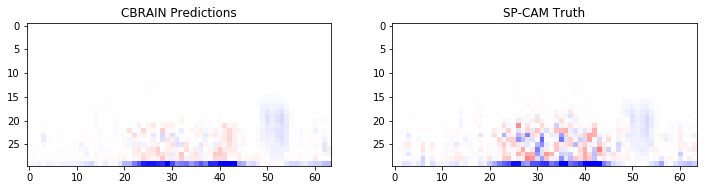

In [21]:
diag.plot_double_lat_lev_slice('SPDQ', 1, 0, vmin=-5e-7, vmax=5e-7, cmap='bwr')

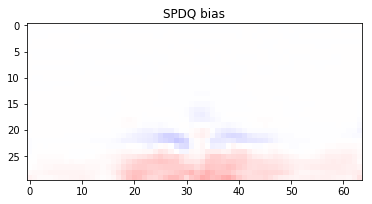

In [22]:
diag.plot_stat_lat_lev_mean('bias', 'SPDQ', vmin=-5e-8, vmax=5e-8, cmap='bwr')

In [ ]:
get_purecrm_stats('B002_purecrm_ess_sample1_deep1')

In [25]:
get_purecrm_stats('B003_purecrm_ess_sample1_tanh')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:47<00:00, 12.62it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 267.624974687
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  7.23547e-10  1.36536e-15  8.32953e-16  2.25854e-15      0.471466
SPDT -9.62342e-07  1.14744e-09  1.00434e-09  2.22517e-09       0.40612
QRL   1.37961e-06  2.31197e-10  6.15432e-11  3.13624e-10      0.331528
QRS  -4.51383e-07   3.1669e-11  1.50245e-10   1.9229e-10      0.627723
all  -8.34887e-09  3.52578e-10  3.04032e-10  6.82771e-10      0.459209


In [26]:
get_purecrm_stats('B004_purecrm_ess_sample1_mse')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:29<00:00, 13.72it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 32.1739559174
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ -1.44042e-11  1.19718e-15  1.07258e-15  2.25854e-15      0.512979
SPDT  1.21352e-08  9.37052e-10  1.31008e-09  2.22517e-09      0.552854
QRL   -6.9258e-09  1.17334e-10  2.06188e-10  3.13624e-10       0.60863
QRS  -9.03553e-09  2.08555e-11  1.73175e-10   1.9229e-10      0.760162
all   -9.6014e-10  2.68811e-10   4.2236e-10  6.82771e-10      0.608656


In [8]:
get_stats('B005_purecrm_ess_sample1_lr1', 'purecrm')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [04:22<00:00, 10.92it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 562.596083411
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  5.33742e-10  1.50669e-15  7.46111e-16  2.25854e-15      -9.08153
SPDT -9.57086e-07  1.27034e-09  9.25632e-10  2.22517e-09      0.357174
QRL   1.63533e-06  2.76137e-10  4.46853e-11  3.13624e-10      0.143316
QRS  -8.34128e-07  5.28353e-11  1.51219e-10   1.9229e-10      0.435124
all  -3.88375e-08  3.99829e-10  2.80384e-10  6.82771e-10      -2.03648


In [9]:
get_stats('B006_purecrm_ess_sample1_deep1_tanh', 'purecrm')

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [05:00<00:00,  9.54it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 259.272209473
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  6.52305e-10  1.27906e-15  9.09679e-16  2.25854e-15      0.498797
SPDT -8.70314e-07  1.05302e-09  1.07841e-09  2.22517e-09      0.438019
QRL   1.11861e-06  1.95686e-10  1.03737e-10  3.13624e-10      0.403785
QRS  -3.74977e-07    2.789e-11  1.54035e-10   1.9229e-10      0.669903
all  -3.15076e-08   3.1915e-10  3.34046e-10  6.82771e-10      0.502626


In [6]:
get_stats('B007_purecrm_ess_sample1_bs128', 'purecrm')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:30<00:00, 19.08it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 362.400219221
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  6.86639e-10  1.42751e-15  8.05503e-16  2.25854e-15      -13.5649
SPDT -1.06196e-06  1.23121e-09  1.01771e-09  2.22517e-09      0.363882
QRL   1.68577e-06  2.89164e-10  5.46203e-11  3.13624e-10      0.112509
QRS  -5.26512e-07  4.18396e-11  1.49506e-10   1.9229e-10      0.494826
all   2.44957e-08  3.90554e-10   3.0546e-10  6.82771e-10      -3.14841


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [7]:
get_stats('B011_purecrm_ess_sample1_deep2', 'purecrm')

  0%|          | 2/2868 [00:00<03:11, 14.96it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:56<00:00, 12.14it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 18.1285692931
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ -1.88507e-11  1.10337e-15  1.16983e-15  2.25854e-15       0.51306
SPDT  1.91803e-08  8.49573e-10   1.3861e-09  2.22517e-09      0.500514
QRL   5.12045e-09   1.0106e-10  2.16129e-10  3.13624e-10      0.561471
QRS  -7.33987e-09  2.15852e-11  1.70898e-10   1.9229e-10      0.749456
all    4.2355e-09  2.43055e-10  4.43281e-10  6.82771e-10      0.581125


In [9]:
get_stats('B012_purecrm_ess_sample1_wide1', 'purecrm')

  0%|          | 1/2868 [00:00<06:18,  7.57it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:25<00:00, 19.68it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 26.9128463325
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  1.41277e-11  1.24766e-15  1.00916e-15  2.25854e-15      0.512866
SPDT -2.17576e-08  1.02993e-09  1.18876e-09  2.22517e-09      0.487355
QRL   1.87796e-08  1.74963e-10   1.3535e-10  3.13624e-10      0.465434
QRS   -5.4457e-09  2.65039e-11  1.66302e-10   1.9229e-10      0.698366
all  -2.10239e-09  3.07849e-10  3.72603e-10  6.82771e-10      0.541005


In [7]:
get_stats('B013_purecrm_ess_sample1_mse_var', 'purecrm')

  0%|          | 1/2868 [00:00<08:06,  5.89it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:23<00:00, 19.95it/s]

Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 53.1493661237
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  -1.6666e-10  1.20159e-15  1.15124e-15  2.25854e-15      0.471388
SPDT  3.23739e-07  9.38556e-10  1.40732e-09  2.22517e-09      0.550967
QRL  -4.05483e-07   1.1894e-10  2.20937e-10  3.13624e-10      0.598929
QRS   4.45904e-07  2.08895e-11  1.86979e-10   1.9229e-10      0.763699
all   9.09984e-08  2.69597e-10   4.5381e-10  6.82771e-10      0.596246



../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [7]:
get_stats('B015_purecrm_ess_sample1_impr', 'purecrm')

  0%|          | 0/2868 [00:00<?, ?it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:07<00:00, 15.27it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 34.5586245003
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ -1.94226e-11  1.09648e-15  1.18147e-15  2.25854e-15      0.538316
SPDT  1.93201e-08  8.15725e-10   1.4278e-09  2.22517e-09      0.572192
QRL   1.51416e-09  8.35849e-11  2.34131e-10  3.13624e-10      0.671833
QRS  -3.30423e-09  1.21258e-11  1.80681e-10   1.9229e-10      0.857204
all   4.37764e-09  2.27859e-10  4.60654e-10  6.82771e-10      0.659886


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [8]:
get_stats('B016_purecrm_ess_sample1_impr_var', 'purecrm')

  0%|          | 1/2868 [00:00<06:11,  7.72it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:35<00:00, 18.45it/s]
../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 52.973361563
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ -1.52658e-10  1.10026e-15   1.2599e-15  2.25854e-15       0.50152
SPDT  3.00419e-07  8.18069e-10  1.52172e-09  2.22517e-09       0.57096
QRL  -3.52449e-07  8.44141e-11  2.48644e-10  3.13624e-10      0.668771
QRS   4.00931e-07  1.26019e-11   1.9234e-10   1.9229e-10      0.854808
all   8.71872e-08  2.28771e-10  4.90676e-10  6.82771e-10      0.649015


In [10]:
get_stats('B014_purecrm_essv2_sample1_base', 'purecrm')

  0%|          | 1/2868 [00:00<06:17,  7.59it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:06<00:00, 22.74it/s]


Mean squared energy violation. True: 73.5111207161
Mean squared energy violation. Pred: 32.9083586908
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  4.18814e-11  1.19982e-15  1.07231e-15  2.25854e-15      0.493179
SPDT -1.19131e-07  9.40018e-10  1.31018e-09  2.22517e-09      0.553984
QRL   5.76843e-09  1.18709e-10  2.03306e-10  3.13624e-10      0.601227
QRS  -5.85358e-09  2.20564e-11   1.7163e-10   1.9229e-10      0.745109
all  -2.97935e-08  2.70196e-10  4.21278e-10  6.82771e-10      0.598375


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [14]:
d = get_stats('B017_purecrm_essv2_norm-by-var_sample1_base', 'purecrm', 'v2_norm-by-var')

  0%|          | 2/2868 [00:00<03:02, 15.72it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [01:59<00:00, 24.01it/s]


Mean squared energy violation. True: 73.567998927
Mean squared energy violation. Pred: 29.9443350001
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  7.21582e-12  1.19756e-15  1.02762e-15  2.23206e-15      0.518451
SPDT  6.27665e-09   9.2792e-10  1.27283e-09  2.20551e-09      0.560351
QRL  -1.78392e-08  1.10434e-10  1.87919e-10  2.95295e-10      0.617147
QRS  -4.74111e-09  1.88736e-11  1.70939e-10  1.89631e-10      0.775589
all  -4.07411e-09  2.64307e-10  4.07922e-10  6.72609e-10      0.617884


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


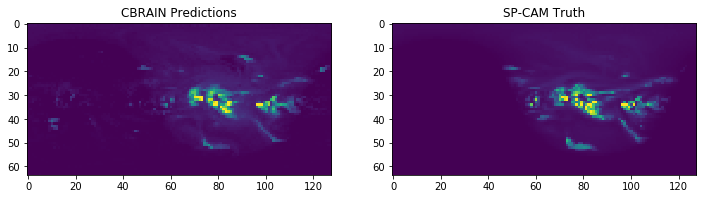

In [18]:
d.plot_double_lat_lon_slice('QRS', 40, 12, vmin=0, vmax=0.0001)

In [24]:
diag = ModelDiagnostics(
    model_dir + 'B019_purecrm_essv2_noadiab_sample1_max_rs.h5', 
    pre_dir + 'purecrm_essv2_noadiab_valid_sample1_features.nc',
    pre_dir + 'purecrm_essv2_noadiab_valid_sample1_targets.nc',
    pre_dir + 'purecrm_essv2_noadiab_train_sample1_norm.nc',
    fsub='feature_means', fdiv='max_rs', tmult='target_conv'
)

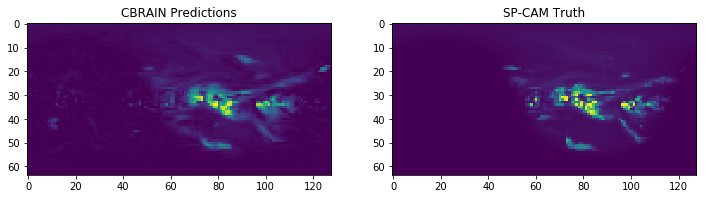

In [25]:
diag.plot_double_lat_lon_slice('QRS', 40, 12, vmin=0, vmax=0.0001)

In [14]:
d = get_stats('B018_purecrm_essv2_nonorm_sample1_max_rs', 'purecrm', 'v2_nonorm', norms)

  0%|          | 1/2868 [00:00<04:56,  9.67it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:12<00:00, 21.59it/s]


Mean squared energy violation. True: 811.318743712
Mean squared energy violation. Pred: 737.415635916
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  4.01283e-11  1.20451e-15  1.01277e-15  2.23206e-15       0.52495
SPDT -9.32125e-08  9.26142e-10   1.2665e-09  2.20551e-09      0.543355
QRL   3.55019e-09  1.15217e-10  1.79859e-10  2.95295e-10      0.625118
QRS  -3.33058e-09   1.9771e-11  1.70309e-10  1.89631e-10      0.765219
all  -2.32382e-08  2.65283e-10  4.04168e-10  6.72609e-10       0.61466


/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:238: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [18]:
d = get_stats('B019_purecrm_essv2_noadiab_sample1_max_rs', 'purecrm', 'v2_noadiab', norms)

100%|██████████| 2868/2868 [02:11<00:00, 21.79it/s]


             bias          mse     pred_var     true_var        r2     r2_v2
SPDQ   4.2093e-11  1.85129e-15  1.31264e-15  3.18865e-15  -11.9436  0.426724
SPDT -7.37431e-08  1.66566e-09  1.44552e-09  3.09963e-09 -0.357058  0.417010
QRL   1.71676e-08  1.78876e-10  2.35874e-10  4.14958e-10  0.332175  0.565277
QRS  -9.72507e-09  2.72447e-11  8.56936e-11  1.12695e-10      -inf  0.751325
all           NaN          NaN          NaN          NaN       NaN  0.540084


/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  lev_r2 = 1. - (np.mean(mse, axis=(0, 1)) / np.mean(true_var, axis=(0, 1)))


In [25]:
d.stats['bias'].shape

(64, 128, 4, 30)

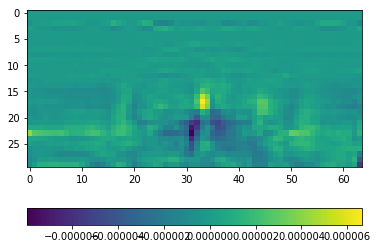

In [31]:
f = d.plot_slice(d.stats['bias'][:, :, 1, :].mean(1).T)

In [10]:
d = get_stats('B020_purecrm_essv2_nonorm_sample1_noise1', 'purecrm', 'v2_nonorm', norms)

  0%|          | 2/2868 [00:00<02:53, 16.56it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [02:26<00:00, 19.60it/s]


Mean squared energy violation. True: 811.318743712
Mean squared energy violation. Pred: 734.295602881
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  3.62494e-11   1.2241e-15  9.35119e-16  2.23206e-15      0.520626
SPDT  1.47317e-09  9.47949e-10  1.19972e-09  2.20551e-09      0.532522
QRL   3.26229e-08  1.19447e-10  1.59442e-10  2.95295e-10      0.610555
QRS  -4.19315e-09   1.8973e-11  1.70018e-10  1.89631e-10      0.775716
all   7.48478e-09  2.71593e-10  3.82296e-10  6.72609e-10      0.609855


/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:238: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


In [23]:
d21 = get_stats('B021_purecrm_essv2_nonorm_sample1_dr1', 'purecrm', 'v2_nonorm', norms, False)

In [24]:
d21.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               78336     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               61560     
Total params: 139,896
Trainable params: 139,896
Non-trainable params: 0
_________________________________________________________________


In [30]:
l21 = d21.model.layers

In [25]:
w21 = d21.model.get_weights()`

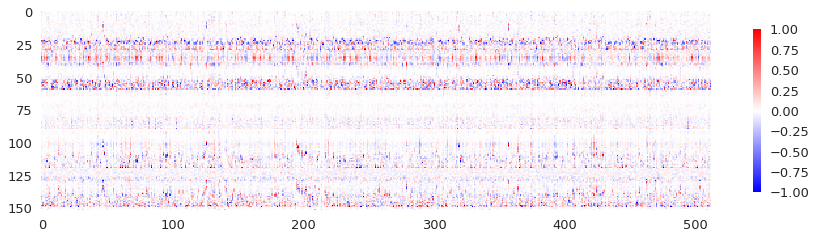

In [26]:
plt.figure(figsize=(15, 10)); plt.imshow(w21[0], vmax=1, vmin=-1, cmap='bwr'); plt.colorbar(shrink=0.3);

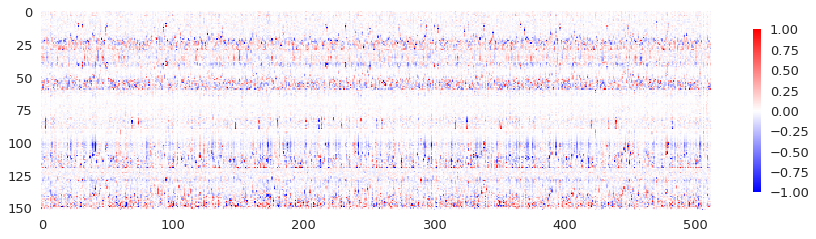

In [27]:
plt.figure(figsize=(15, 10)); plt.imshow(w18[0], vmax=1, vmin=-1, cmap='bwr'); plt.colorbar(shrink=0.3);

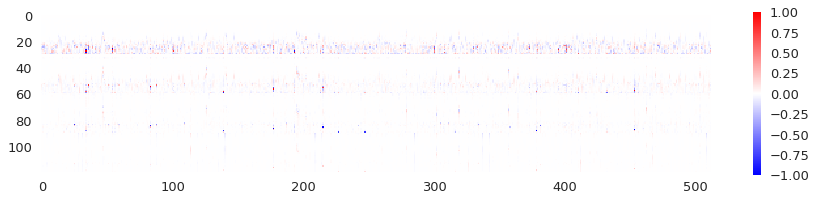

In [28]:
plt.figure(figsize=(15, 10)); plt.imshow(w21[2].T, vmax=1, vmin=-1, cmap='bwr'); plt.colorbar(shrink=0.3);

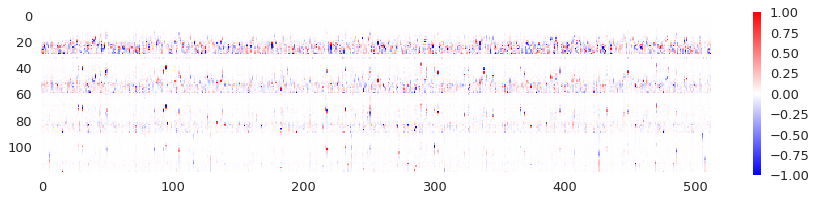

In [29]:
plt.figure(figsize=(15, 10)); plt.imshow(w18[2].T, vmax=1, vmin=-1, cmap='bwr'); plt.colorbar(shrink=0.3);

In [12]:
d = get_stats('B022_purecrm_essv2_nonorm_sample1_dr2_deep', 'purecrm', 'v2_nonorm', norms)

  0%|          | 2/2868 [00:00<03:30, 13.65it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 152; targets have shape 120


100%|██████████| 2868/2868 [03:04<00:00, 15.57it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:238: RuntimeWarning: invalid value encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


Mean squared energy violation. True: 811.318743712
Mean squared energy violation. Pred: 737.590561969
             bias          mse     pred_var     true_var expl_var_cut9
SPDQ  5.32293e-11  1.16457e-15  1.01675e-15  2.23206e-15      0.508545
SPDT -7.85995e-08  8.98011e-10   1.2157e-09  2.20551e-09      0.532886
QRL  -2.99161e-09  1.08665e-10  1.54773e-10  2.95295e-10      0.589509
QRS   1.44637e-08  2.20593e-11  1.51851e-10  1.89631e-10      0.738744
all  -1.67685e-08  2.57184e-10  3.80582e-10  6.72609e-10      0.592421


In [16]:
d = get_stats('B025_purecrm_essv2_nonorm_sample1_max_rs_l2', 'purecrm', 'v2_nonorm', norms)

100%|██████████| 2868/2868 [02:05<00:00, 22.76it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  lev_r2 = 1. - (np.mean(mse, axis=(0, 1)) / np.mean(true_var, axis=(0, 1)))


             bias          mse     pred_var     true_var        r2     r2_v2
SPDQ  2.05806e-11  2.60673e-15  2.80241e-16  3.18865e-15   -19.342  0.100386
SPDT -3.97577e-09  2.65414e-09  1.63051e-10  3.09963e-09 -0.396337  0.111695
QRL  -5.15659e-08  4.15002e-10  5.30494e-12  4.14958e-10 -0.239084  0.007561
QRS   1.64321e-08  7.85728e-11  9.49392e-12  1.12695e-10      -inf  0.285553
all           NaN          NaN          NaN          NaN       NaN  0.126299


In [17]:
d26 = get_stats('B026_purecrm_essv2_nonorm_sample1_max_rs_l2v2', 'purecrm', 'v2_nonorm', norms)

100%|██████████| 2868/2868 [02:03<00:00, 23.23it/s]


             bias          mse     pred_var     true_var         r2     r2_v2
SPDQ  1.93094e-11  2.16198e-15  8.78635e-16  3.18865e-15   -5.08672  0.301284
SPDT  2.90569e-08  1.87176e-09  9.65673e-10  3.09963e-09  0.0485018  0.325989
QRL  -9.33596e-08   3.7482e-10   2.7482e-11  4.14958e-10  0.0119508  0.121044
QRS   2.39663e-08  5.27867e-11  5.16964e-11  1.12695e-10       -inf  0.506483
all           NaN          NaN          NaN          NaN        NaN  0.313700


/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  lev_r2 = 1. - (np.mean(mse, axis=(0, 1)) / np.mean(true_var, axis=(0, 1)))


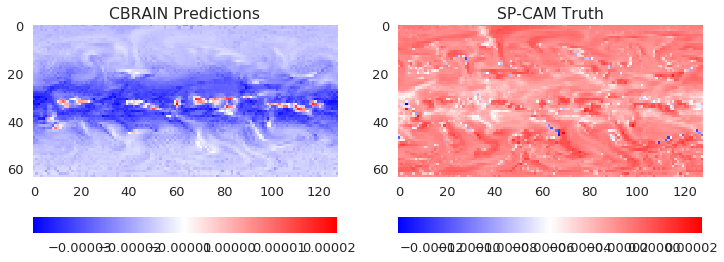

In [15]:
d26.plot_double_xy(1, 20, 'QRL', cmap='bwr');

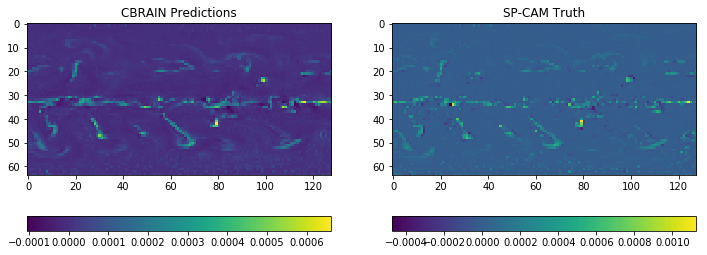

In [17]:
d26.plot_double_xy(100, 20, 'SPDT');

In [17]:
d18 = get_stats('B018_purecrm_essv2_nonorm_sample1_max_rs', 'purecrm', 'v2_nonorm', norms, False)

In [18]:
w18 = d18.model.get_weights()

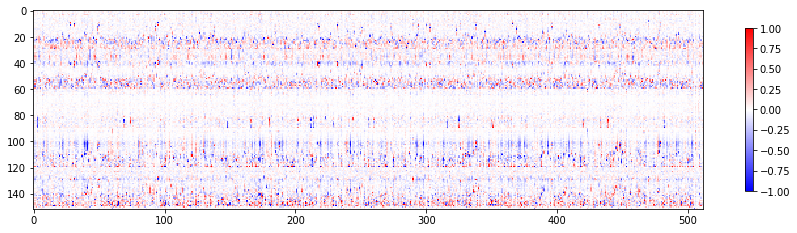

In [44]:
plt.figure(figsize=(15, 10)); plt.imshow(w18[0], vmax=1, vmin=-1, cmap='bwr'); plt.colorbar(shrink=0.3);

In [8]:
d26 = get_stats('B026_purecrm_essv2_nonorm_sample1_max_rs_l2v2', 'purecrm', 'v2_nonorm', norms, False)

In [20]:
w26 = d26.model.get_weights()

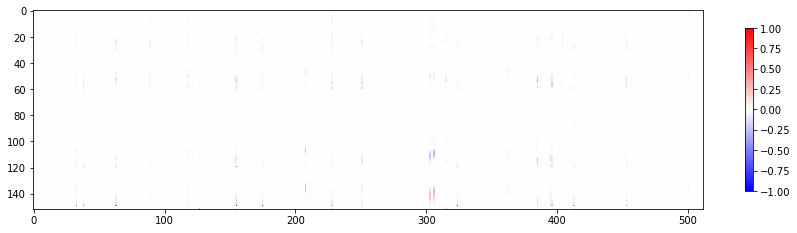

In [46]:
plt.figure(figsize=(15, 10)); plt.imshow(w26[0], vmax=1, vmin=-1, cmap='bwr'); plt.colorbar(shrink=0.3);

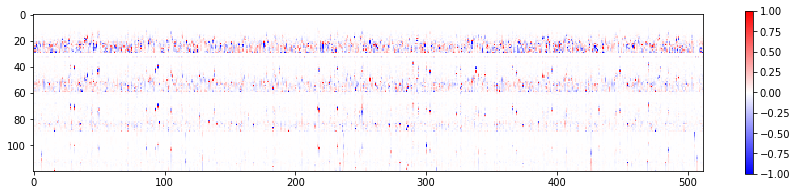

In [47]:
plt.figure(figsize=(15, 10)); plt.imshow(w18[2].T, vmax=1, vmin=-1, cmap='bwr'); plt.colorbar(shrink=0.3);

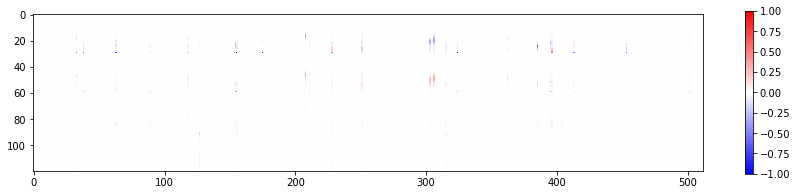

In [48]:
plt.figure(figsize=(15, 10)); plt.imshow(w26[2].T, vmax=1, vmin=-1, cmap='bwr'); plt.colorbar(shrink=0.3);

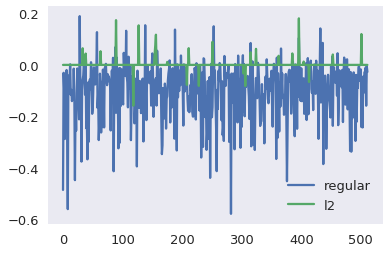

In [21]:
plt.plot(w18[1], label='regular'); plt.plot(w26[1], label='l2'); plt.legend();

In [22]:
d28 = get_stats('B028_purecrm_essv2_nonorm_sample1_max_rs_tiny', 'purecrm', 'v2_nonorm', norms)

100%|██████████| 2868/2868 [04:30<00:00, 10.60it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  lev_r2 = 1. - (np.mean(mse, axis=(0, 1)) / np.mean(true_var, axis=(0, 1)))


             bias          mse     pred_var     true_var         r2     r2_v2
SPDQ  1.49133e-11  1.77333e-15  1.39142e-15  3.18865e-15   -29.6654  0.493399
SPDT -1.88549e-08  1.41281e-09  1.66481e-09  3.09963e-09  -0.340533  0.452624
QRL  -3.32473e-08  2.28772e-10  1.89555e-10  4.14958e-10 -0.0337106  0.403355
QRS  -3.45127e-09  3.65957e-11  7.65385e-11  1.12695e-10       -inf  0.665619
all           NaN          NaN          NaN          NaN        NaN  0.503749


In [8]:
d29 = get_stats('B029_purecrm_essv2_nonorm_sample1_max_rs_deep_l2_tanh', 'purecrm', 'v2_nonorm', norms)

100%|██████████| 2868/2868 [03:00<00:00, 15.93it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  lev_r2 = 1. - (np.mean(mse, axis=(0, 1)) / np.mean(true_var, axis=(0, 1)))


             bias          mse     pred_var     true_var        r2     r2_v2
SPDQ -2.53591e-11  2.06299e-15  1.08175e-15  3.18865e-15  -9.57508  0.293911
SPDT   1.2728e-08  1.84851e-09  1.14199e-09  3.09963e-09 -0.193928  0.322467
QRL  -7.69197e-08  3.98096e-10  3.14172e-11  4.14958e-10 -0.479545  0.041818
QRS   2.40735e-08  5.81724e-11   4.2227e-11  1.12695e-10      -inf  0.457440
all           NaN          NaN          NaN          NaN       NaN  0.278909


In [9]:
d30 = get_stats('B030_purecrm_essv2_nonorm_sample1_max_rs_deep_l2v2_tanh', 'purecrm', 'v2_nonorm', norms)

100%|██████████| 2868/2868 [02:54<00:00, 16.42it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  lev_r2 = 1. - (np.mean(mse, axis=(0, 1)) / np.mean(true_var, axis=(0, 1)))


             bias          mse     pred_var     true_var         r2     r2_v2
SPDQ  6.95878e-11  1.86265e-15  1.30241e-15  3.18865e-15   -14.6589  0.374527
SPDT  -9.9375e-08  1.65568e-09  1.41128e-09  3.09963e-09 -0.0464797  0.371925
QRL  -1.07157e-07  3.70083e-10  5.45215e-11  4.14958e-10   -0.42454  0.087817
QRS  -1.53566e-08   5.5132e-11  5.36616e-11  1.12695e-10       -inf  0.484009
all           NaN          NaN          NaN          NaN        NaN  0.329570


In [10]:
w30 = d30.model.get_weights(); len(w30)

20

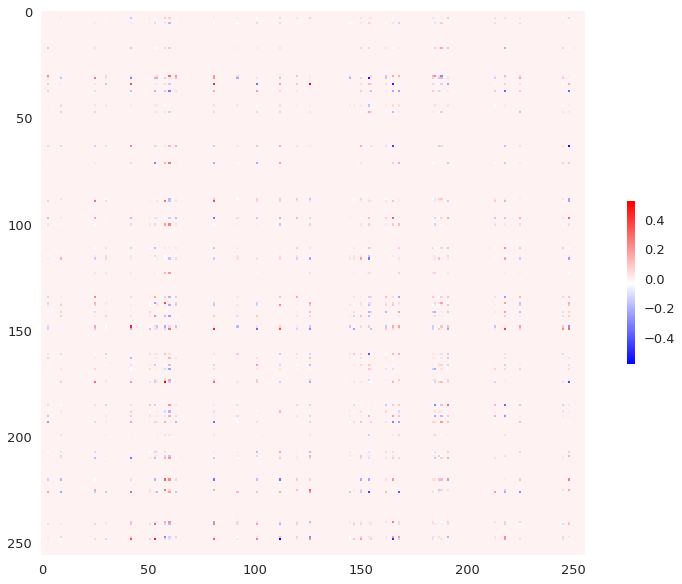

In [16]:
plt.figure(figsize=(15, 10)); plt.imshow(w30[10], cmap='bwr'); plt.colorbar(shrink=0.3);

## New stuff

In [29]:
d = get_stats('A001_fullphy_ess_sample1_base', 'fullphy')

  0%|          | 1/2868 [00:00<07:11,  6.64it/s]

Generator will have 23494656 samples in 2868 batches
Features have shape 92; targets have shape 60


100%|██████████| 2868/2868 [01:38<00:00, 29.10it/s]


                 bias          mse     pred_var     true_var expl_var_cut9
TPHYSTND -1.06326e-06  1.21195e-09  9.50589e-10  2.18991e-09      0.439754
PHQ       9.15635e-10  1.28949e-15  2.58526e-16  1.60896e-15      0.418818
all      -5.31174e-07  6.05977e-10  4.75295e-10  1.09495e-09      0.429286


../diagnostics/model_diagnostics.py:248: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


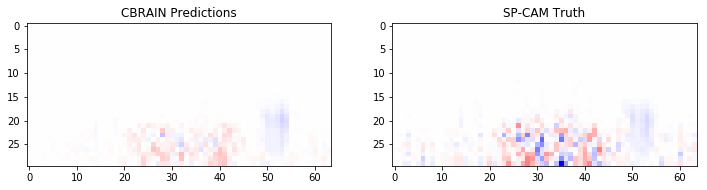

In [30]:
d.plot_double_lat_lev_slice('PHQ', 1, 0, vmin=-5e-7, vmax=5e-7, cmap='bwr')

In [18]:
da2 = get_stats('A002_fullphy_essv2_nonorm_sample1_max_rs', 'fullphy', 'v2_nonorm', norms)

100%|██████████| 2868/2868 [01:36<00:00, 29.84it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])


                 bias          mse     pred_var     true_var        r2  \
TPHYSTND  6.06471e-10  1.56431e-09   1.3141e-09  2.88511e-09  0.307836   
PHQ      -8.20672e-12  1.77935e-15  5.09274e-16  2.30887e-15  -12.6998   
all               NaN          NaN          NaN          NaN       NaN   

             r2_v2  
TPHYSTND  0.474311  
PHQ       0.438756  
all       0.456533  


/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  lev_r2 = 1. - (np.mean(mse, axis=(0, 1)) / np.mean(true_var, axis=(0, 1)))


In [19]:
da3 = get_stats('A003_fullphy_essv2_nonorm_sample1_max_rs_deep', 'fullphy', 'v2_nonorm', norms)

100%|██████████| 2868/2868 [01:49<00:00, 26.21it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:235: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])


                 bias          mse     pred_var     true_var        r2  \
TPHYSTND  6.12423e-08  1.35618e-09  1.55229e-09  2.88511e-09  0.417401   
PHQ      -1.54253e-11  1.65009e-15  6.78151e-16  2.30887e-15   -5.3557   
all               NaN          NaN          NaN          NaN       NaN   

             r2_v2  
TPHYSTND  0.516465  
PHQ       0.470275  
all       0.493370  


/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  lev_r2 = 1. - (np.mean(mse, axis=(0, 1)) / np.mean(true_var, axis=(0, 1)))


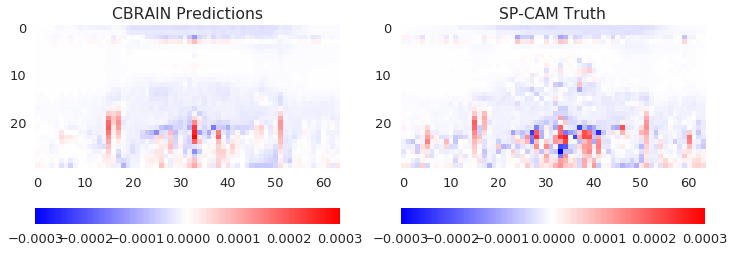

In [22]:
da3.plot_double_yz(10, 0, 'TPHYSTND', cmap='bwr', vmin=-3e-4, vmax=3e-4);

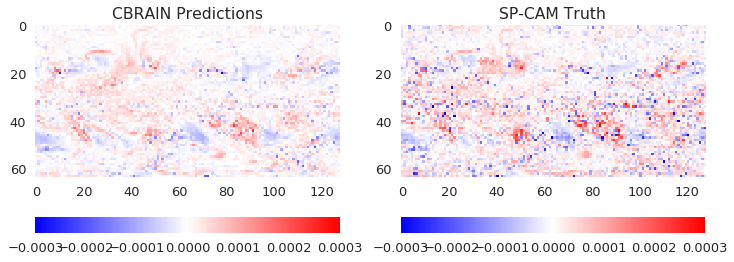

In [23]:
da3.plot_double_xy(10, -1, 'TPHYSTND', cmap='bwr', vmin=-3e-4, vmax=3e-4);

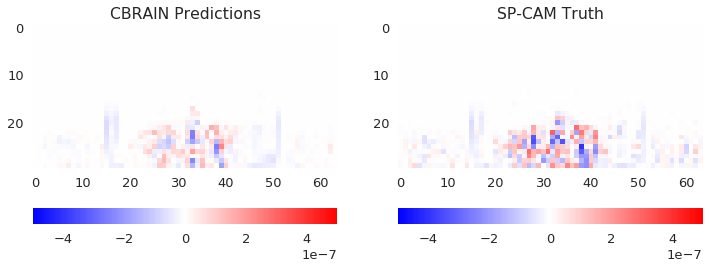

In [25]:
da3.plot_double_yz(10, 0, 'PHQ', cmap='bwr', vmin=-5e-7, vmax=5e-7);

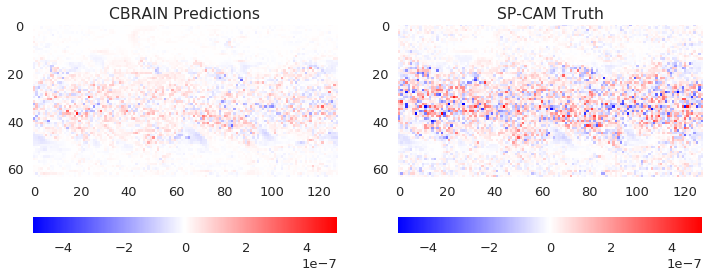

In [26]:
da3.plot_double_xy(10, -1, 'PHQ', cmap='bwr', vmin=-5e-7, vmax=5e-7);

In [9]:
dd1 = get_stats('D001_fbp_sample1_max_rs_deep', 'fbp', norms)

100%|██████████| 2868/2868 [01:56<00:00, 24.58it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                  bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHY_NOKE -9.71128e-08  1.35771e-09 -6.30691e-07 -5.33578e-07  1.77848e-09   
PHQ          6.291e-11  1.70184e-15  1.13467e-09  1.07176e-09  7.92895e-16   
all                NaN          NaN          NaN          NaN          NaN   

           true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHY_NOKE  3.12816e-09  1.62412e-09   2.9714e-09  0.429172  3.12816e-09   
PHQ        2.47724e-15   7.3781e-16  2.42256e-15  -5.00755  2.47724e-15   
all                NaN          NaN          NaN       NaN          NaN   

             hor_tmean      hor_mse     hor_tvar    hor_r2  
TPHY_NOKE -5.33578e-07  1.35771e-09  3.10721e-09  0.532326  
PHQ        1.07176e-09  1.70184e-15  2.46582e-15  0.484591  
all                NaN          NaN          NaN  0.508459  


In [10]:
norms = ('feature_means', 'max_rs', None, 'target_conv')

In [11]:
dd2 = get_stats('D002_fbp_ke_sample1_max_rs_deep', 'fbp_ke', norms)

100%|██████████| 2868/2868 [02:16<00:00, 20.97it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -1.22859e-08  1.36595e-09  7.44371e-08   8.6723e-08  1.77756e-09   
PHQ       1.00413e-11  1.70209e-15   1.0818e-09  1.07176e-09  8.03042e-16   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.10989e-09  1.62917e-09  2.96076e-09  0.423133  3.10989e-09   
PHQ       2.47724e-15   7.4782e-16  2.42256e-15  -6.60208  2.47724e-15   
all               NaN          NaN          NaN       NaN          NaN   

            hor_tmean      hor_mse     hor_tvar    hor_r2  
TPHYSTND   8.6723e-08  1.36595e-09  3.09001e-09  0.526284  
PHQ       1.07176e-09  1.70209e-15  2.46582e-15  0.484162  
all               NaN          NaN          NaN  0.505223  


In [12]:
dd3 = get_stats('D003_fbp_engy_ess_sample1_max_rs_deep', 'fbp_engy_ess', norms)

100%|██████████| 2868/2868 [02:04<00:00, 23.09it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -6.43548e-08  1.35965e-09  2.23682e-08   8.6723e-08  1.78429e-09   
PHQ       4.68336e-11  1.70146e-15  1.11859e-09  1.07176e-09  8.05755e-16   
FSNT        0.0286551      756.256      230.926      230.898       158730   
FSNS         0.205184      931.056      164.062      163.856      88939.7   
FLNT       -0.0935574      156.445      222.465      222.559      51485.3   
FLNS         0.181646      90.9335       52.496      52.3144      3438.77   
PRECT    -2.58872e-11  1.39822e-15  3.11701e-08   3.1196e-08  1.17869e-14   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.10989e-09  1.63502e-09  2.96076e-09  0.429816  3.10989e-09   
PHQ       2.47724e-15  7.50379e-16  2.42256e-15  -5.63268  2.47724e-15   
FSNT           159345      83640.2      84282.4      -inf       159345   
FSNS      

In [14]:
dd4 = get_stats('D004_fbp_engy_ess_fullyear_max_rs_deep', 'fbp_engy_ess', norms, sample='fullyear')

100%|██████████| 2868/2868 [02:01<00:00, 23.52it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -5.43697e-08  1.29304e-09 -7.67436e-08 -2.23739e-08   1.8037e-09   
PHQ       5.51672e-11  1.66702e-15  1.10512e-09  1.04995e-09  8.11597e-16   
FSNT         0.385587      664.287      231.783      231.397       159892   
FSNS         0.410014      823.651      164.846      164.436      89752.7   
FLNT        0.0314827        121.7       222.98      222.949      51713.5   
FLNS         0.156288      80.1478      52.8495      52.6932      3475.48   
PRECT    -1.45806e-10  1.32015e-15  3.07723e-08  3.09181e-08  1.18049e-14   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.09948e-09  1.66185e-09  2.95515e-09  0.468804  3.09948e-09   
PHQ       2.47541e-15  7.58944e-16  2.42379e-15  -4.32583  2.47541e-15   
FSNT           160087      84208.9      84664.5      -inf       160087   
FSNS      

In [15]:
dd4 = get_stats('D005_fbp_engy_ess_fullyear_max_rs_deep_mae', 'fbp_engy_ess', norms, sample='fullyear')

100%|██████████| 2868/2868 [01:51<00:00, 25.83it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -1.25206e-06  1.29437e-09 -1.27444e-06 -2.23739e-08  1.70825e-09   
PHQ       1.15908e-09  1.70365e-15  2.20903e-09  1.04995e-09  7.22504e-16   
FSNT         0.594857      614.527      231.992      231.397       160732   
FSNS          0.66409      771.088        165.1      164.436      90623.6   
FLNT         0.348068      61.2605      223.297      222.949        51936   
FLNS       -0.0479664      70.7321      52.6453      52.6932       3482.8   
PRECT    -5.30218e-09  1.42161e-15  2.56159e-08  3.09181e-08  1.09407e-14   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.09948e-09  1.57935e-09  2.95515e-09  0.553236  3.09948e-09   
PHQ       2.47541e-15  6.47779e-16  2.42379e-15  0.375248  2.47541e-15   
FSNT           160087      84897.2      84664.5      -inf       160087   
FSNS      

In [13]:
dd8 = get_stats('D008_fbp_engy_ess_sample1_max_rs_deep_eq', 'fbp_engy_ess', norms)

100%|██████████| 2868/2868 [01:55<00:00, 24.84it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:246: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:252: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -9.78728e-08  1.36416e-09 -1.11498e-08   8.6723e-08  1.76907e-09   
PHQ      -2.33828e-11  1.70316e-15  1.04838e-09  1.07176e-09  7.86539e-16   
FSNT       -0.0335258      763.797      230.864      230.898       158250   
FSNS        -0.656986      937.895      163.199      163.856      88672.4   
FLNT        -0.636856      166.897      221.922      222.559      51295.1   
FLNS         0.319069      102.053      52.6335      52.3144      3432.89   
PRECT     4.32447e-10  1.46726e-15  3.16284e-08   3.1196e-08   1.2289e-14   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.10989e-09  1.62177e-09  2.96076e-09  0.419849  3.10989e-09   
PHQ       2.47724e-15  7.31278e-16  2.42256e-15  -2511.02  2.47724e-15   
FSNT           159345      83303.2      84282.4      -inf       159345   
FSNS      

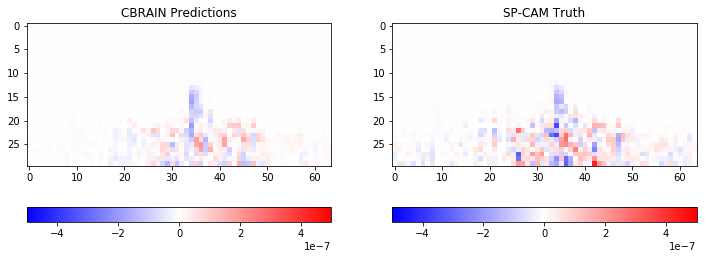

In [14]:
dd8.plot_double_yz(10, 0, 'PHQ', cmap='bwr', vmin=-5e-7, vmax=5e-7);

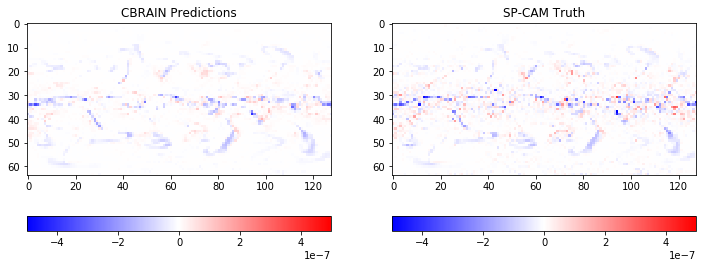

In [16]:
dd8.plot_double_xy(10, 20, 'PHQ', cmap='bwr', vmin=-5e-7, vmax=5e-7);

(-1, 1)

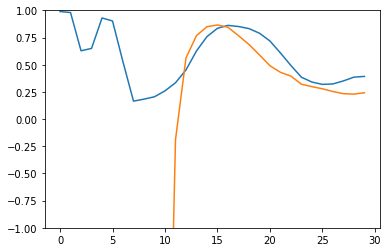

In [21]:
plt.plot(dd8.stats['hor_r2'][dd8._get_var_idxs('TPHYSTND')])
plt.plot(dd8.stats['hor_r2'][dd8._get_var_idxs('PHQ')]); plt.ylim(-1, 1)

In [22]:
dd9 = get_stats('D009_fbp_engy_ess_fullyear_max_rs_deep_eq', 'fbp_engy_ess', norms, sample='fullyear')

100%|██████████| 2868/2868 [02:05<00:00, 22.94it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:246: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:252: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -2.29577e-07   1.2837e-09 -2.51951e-07 -2.23739e-08  1.75158e-09   
PHQ       5.43812e-11  1.66296e-15  1.10433e-09  1.04995e-09  8.04482e-16   
FSNT         0.535891      659.344      231.933      231.397       159824   
FSNS        0.0815088      815.774      164.517      164.436      89802.8   
FLNT        -0.432634      122.043      222.516      222.949      51569.5   
FLNS         0.491364      88.1458      53.1846      52.6932      3508.89   
PRECT    -2.30906e-10  1.38034e-15  3.06872e-08  3.09181e-08  1.19554e-14   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.09948e-09  1.61346e-09  2.95515e-09    0.4669  3.09948e-09   
PHQ       2.47541e-15  7.51991e-16  2.42379e-15  -2643.85  2.47541e-15   
FSNT           160087      84161.5      84664.5      -inf       160087   
FSNS      

(-1, 1)

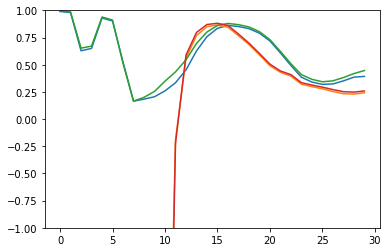

In [23]:
plt.plot(dd8.stats['hor_r2'][dd8._get_var_idxs('TPHYSTND')])
plt.plot(dd8.stats['hor_r2'][dd8._get_var_idxs('PHQ')]); plt.ylim(-1, 1)
plt.plot(dd9.stats['hor_r2'][dd8._get_var_idxs('TPHYSTND')])
plt.plot(dd9.stats['hor_r2'][dd8._get_var_idxs('PHQ')]); plt.ylim(-1, 1)

In [10]:
! ls /export/home/srasp/repositories/CBRAIN-CAM/saved_models/D01*.h5

/export/home/srasp/repositories/CBRAIN-CAM/saved_models/D010_fbp_engy_ess_sample1_max_rs_deep_eq_l2.h5
/export/home/srasp/repositories/CBRAIN-CAM/saved_models/D011_fbp_engy_ess_sample1_max_rs_deep_eq_dr.h5
/export/home/srasp/repositories/CBRAIN-CAM/saved_models/D012_fbp_engy_ess_sample1_max_rs_deep_eq_tanh.h5
/export/home/srasp/repositories/CBRAIN-CAM/saved_models/D013_fbp_engy_ess_sample1_max_rs_deep_eq_tanh_l2_dr.h5


In [12]:
dd10 = get_stats('D010_fbp_engy_ess_sample1_max_rs_deep_eq_l2', 'fbp_engy_ess', norms, sample='sample1')

100%|██████████| 2868/2868 [02:05<00:00, 22.81it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:246: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:252: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND  1.41124e-08  1.68317e-09  1.00835e-07   8.6723e-08  1.40699e-09   
PHQ       -1.0818e-10  1.86285e-15  9.63581e-10  1.07176e-09  6.05846e-16   
FSNT        -0.124795      1219.12      230.773      230.898       157847   
FSNS        -0.196523      1532.87       163.66      163.856      88287.2   
FLNT        -0.701149      586.589      221.858      222.559      50794.3   
FLNS         0.780725      287.849      53.0951      52.3144      3264.35   
PRECT     6.59081e-10  1.69813e-15  3.18551e-08   3.1196e-08  1.21614e-14   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.10989e-09  1.25826e-09  2.96076e-09   0.24624  3.10989e-09   
PHQ       2.47724e-15  5.50324e-16  2.42256e-15  -1315.15  2.47724e-15   
FSNT           159345      83259.8      84282.4      -inf       159345   
FSNS      

In [13]:
dd11 = get_stats('D011_fbp_engy_ess_sample1_max_rs_deep_eq_dr', 'fbp_engy_ess', norms, sample='sample1')

100%|██████████| 2868/2868 [01:57<00:00, 24.39it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:246: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:252: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND   2.4682e-08  1.99862e-09  1.11405e-07   8.6723e-08   9.1292e-10   
PHQ       3.49689e-10  2.04335e-15  1.42145e-09  1.07176e-09  3.19595e-16   
FSNT          9.31845       2415.8      240.216      230.898       157216   
FSNS         -4.45397      2519.94      159.402      163.856      86510.6   
FLNT         -1.45345      963.319      221.106      222.559      49915.1   
FLNS         -1.88437      534.312        50.43      52.3144      2760.65   
PRECT    -3.52837e-09  2.29981e-15  2.76676e-08   3.1196e-08  9.69829e-15   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var         r2  hor_tsqmean  \
TPHYSTND  3.10989e-09  7.88024e-10  2.96076e-09  0.0924108  3.10989e-09   
PHQ       2.47724e-15   2.6947e-16  2.42256e-15   -632.901  2.47724e-15   
FSNT           159345      78935.6      84282.4       -inf       159345   
FSNS  

In [14]:
dd12 = get_stats('D012_fbp_engy_ess_sample1_max_rs_deep_eq_tanh', 'fbp_engy_ess', norms, sample='sample1')

100%|██████████| 2868/2868 [01:50<00:00, 25.91it/s]


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -2.59936e-07  1.42428e-09 -1.73213e-07   8.6723e-08  1.65059e-09   
PHQ       1.11643e-11   1.7244e-15  1.08293e-09  1.07176e-09  7.45288e-16   
FSNT         0.864213      862.335      231.762      230.898       158862   
FSNS       -0.0523285      1051.56      163.804      163.856      88858.2   
FLNT        0.0469066      207.292      222.606      222.559      51544.2   
FLNS         0.305024       121.79      52.6194      52.3144      3410.57   
PRECT    -3.42986e-10  1.51197e-15   3.0853e-08   3.1196e-08  1.18392e-14   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.10989e-09  1.50355e-09  2.96076e-09   0.34703  3.10989e-09   
PHQ       2.47724e-15   6.8794e-16  2.42256e-15  -2908.55  2.47724e-15   
FSNT           159345      83515.7      84282.4      -inf       159345   
FSNS      

/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:246: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:252: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


In [15]:
dd13 = get_stats('D013_fbp_engy_ess_sample1_max_rs_deep_eq_tanh_l2_dr', 'fbp_engy_ess', norms, sample='sample1')

100%|██████████| 2868/2868 [01:53<00:00, 25.32it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:246: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:252: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -3.66358e-06  3.06166e-09 -3.57686e-06   8.6723e-08  9.99443e-11   
PHQ       2.16818e-09  2.40992e-15  3.23994e-09  1.07176e-09  5.95777e-17   
FSNT         -7.98507      3808.83      222.913      230.898       152786   
FSNS          6.88092      4108.15      170.737      163.856      83923.8   
FLNT         -14.0387      2356.24       208.52      222.559      45216.7   
FLNS          10.0883      903.132      62.4026      52.3144      3901.69   
PRECT    -2.17615e-08  1.26865e-14   9.4345e-09   3.1196e-08  2.10248e-16   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.10989e-09  2.82254e-11  2.96076e-09 -0.510599  3.10989e-09   
PHQ       2.47724e-15  1.78186e-17  2.42256e-15  -9529.55  2.47724e-15   
FSNT           159345      80419.9      84282.4      -inf       159345   
FSNS      

In [16]:
diags['D025_fbp_engy_ess_ref_fullyear_ref_longtrain'][0].mean_stats(9)

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
TPHYSTND,9.75409e-09,1.31152e-09,3.01472e-07,2.91718e-07,1.88914e-09,3.19543e-09,1.7263e-09,3.03139e-09,0.471546,3.19543e-09,2.91718e-07,1.31152e-09,3.17483e-09,0.570058
PHQ,-1.57661e-11,1.67831e-15,1.09767e-09,1.11344e-09,8.44898e-16,2.51426e-15,7.86017e-16,2.45547e-15,-5.5119,2.51426e-15,1.11344e-09,1.67831e-15,2.50224e-15,0.517701
FSNT,-0.326526,668.448,230.487,230.814,158058,159136,83137.8,83994.2,-inf,159136,230.814,668.448,105861,0.993686
FSNS,-0.398883,827.738,163.396,163.795,88287.4,89468.4,49329.8,50318,-inf,89468.4,163.795,827.738,62639.7,0.986786
FLNT,0.07663,118.617,222.572,222.495,51565.8,51641.6,1215.49,1322.3,0.883514,51641.6,222.495,118.617,2137.58,0.944509
FLNS,-0.16283,82.0001,52.2949,52.4577,3419.54,3519.26,549.55,628.439,0.846475,3519.26,52.4577,82.0001,767.446,0.893152
PRECT,5.39478e-11,1.36628e-15,3.162e-08,3.1566e-08,1.23344e-14,1.37268e-14,9.93888e-15,1.13301e-14,0.694858,1.37268e-14,3.1566e-08,1.36628e-15,1.27304e-14,0.892676
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.828367


In [19]:
1.7263e-09/3.03139e-09, 7.86017e-16/2.45547e-15

(0.569474729414559, 0.3201085739186388)

In [51]:
de1 = get_stats('E001_fullphy_fbp_sample1_max_rs_deep', 'fullphy_fbp', norms)

100%|██████████| 2868/2868 [02:00<00:00, 23.77it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: divide by zero encountered in true_divide
  # Compute horizontal stats [var, lev]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: invalid value encountered in true_divide
  # Compute horizontal stats [var, lev]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: divide by zero encountered in true_divide
  


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -8.48433e-08  1.38537e-09  1.87968e-09   8.6723e-08  1.75549e-09   
PHQ       3.64732e-11  1.72077e-15  1.10823e-09  1.07176e-09  7.76439e-16   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.10989e-09  1.60706e-09  2.96076e-09  0.418954  3.10989e-09   
PHQ       2.47724e-15  7.20978e-16  2.42256e-15  -6.57394  2.47724e-15   
all               NaN          NaN          NaN       NaN          NaN   

            hor_tmean      hor_mse     hor_tvar    hor_r2  
TPHYSTND   8.6723e-08  1.38537e-09  3.09001e-09  0.524107  
PHQ       1.07176e-09  1.72077e-15  2.46582e-15  0.482216  
all               NaN          NaN          NaN  0.503161  


In [20]:
1.60706e-09/2.96076e-09, 7.20978e-16/2.42256e-15

(0.5427863116226915, 0.29760996631662373)

In [10]:
de2 = get_stats('E002_fullphy_fbp32_sample1_max_rs_deep', 'fullphy_fbp32', norms)

100%|██████████| 2868/2868 [02:06<00:00, 22.74it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -1.21502e-07  7.56411e-10 -1.11823e-07   9.6795e-09  1.04159e-09   
PHQ       7.39571e-11  5.84635e-16  9.16141e-10  8.42184e-10  3.12094e-16   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var       r2  hor_tsqmean  \
TPHYSTND  1.80634e-09  9.47173e-10  1.70165e-09  0.50022  1.80634e-09   
PHQ       8.89554e-16  2.72152e-16  8.49054e-16 -14.5899  8.89554e-16   
all               NaN          NaN          NaN      NaN          NaN   

            hor_tmean      hor_mse     hor_tvar    hor_r2  
TPHYSTND   9.6795e-09  7.56411e-10  1.79043e-09  0.553808  
PHQ       8.42184e-10  5.84635e-16  8.81848e-16  0.464615  
all               NaN          NaN          NaN  0.509211  


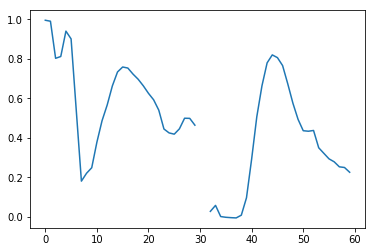

In [12]:
plt.plot(de2.stats['hor_r2'])

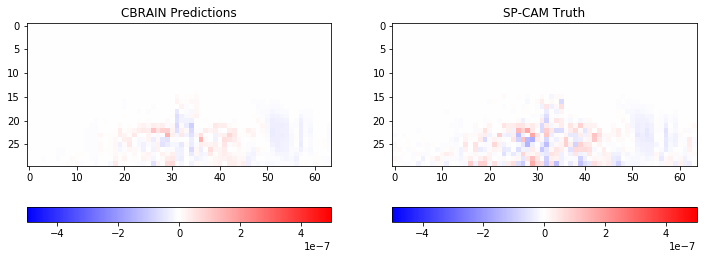

In [20]:
df2.plot_double_yz(10, 0, 'PHQ', cmap='bwr', vmin=-5e-7, vmax=5e-7);

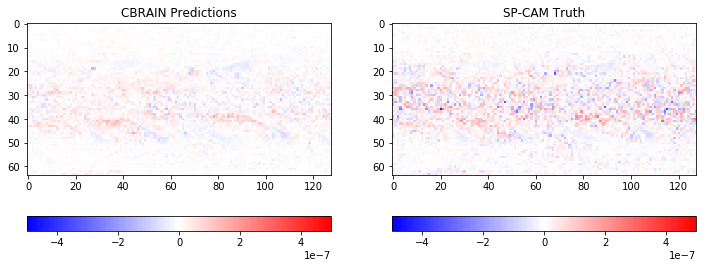

In [23]:
df1.plot_slice(df1.stats['r2'][:, :, df1._get_var_idxs('PHCLDLIQ')].mean(1).T, vmin=0, vmax=1, cmap='jet');

In [13]:
norms

('feature_means', 'max_rs', None, 'target_conv')

In [14]:
norms_f = ('feature_means', 'max_rs', None, 'target_conv_v2')

In [52]:
df1 = get_stats('F001_fbp_engy_cons_sample1_max_rs_deep', 'fbp_engy_cons', norms_f)

100%|██████████| 2868/2868 [03:14<00:00, 14.72it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: divide by zero encountered in true_divide
  # Compute horizontal stats [var, lev]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: invalid value encountered in true_divide
  # Compute horizontal stats [var, lev]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: invalid value encountered in true_divide
  


                  bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHY_NOKE -3.53396e-08  1.05233e-09 -5.68918e-07 -5.33578e-07  2.09031e-09   
PHQ        5.03863e-11  1.42577e-15  1.12215e-09  1.07176e-09   1.0689e-15   
PHCLDLIQ  -8.11622e-12  6.54163e-17  2.25708e-11  3.06871e-11  5.20569e-17   
PHCLDICE  -6.77845e-12  1.21688e-17 -2.08632e-11 -1.40848e-11  7.82365e-18   
TOT_PRECL -1.07932e-07   8.4997e-10  3.10887e-05  3.11966e-05  1.26723e-08   
TOT_PRECS -1.10338e-07  3.82661e-10  5.32148e-06  5.43182e-06  3.78166e-10   
FSNT           0.29882      196.349      231.197      230.898       159330   
FSNS          0.239635      228.564      164.096      163.856      89568.1   
FLNT         0.0450366      60.1968      222.604      222.559      51621.6   
FLNS          0.133843      44.5452      52.4482      52.3144      3479.38   
all                NaN          NaN          NaN          NaN          NaN   

           true_sqmean     pred_var     true_var        r2  hor

In [16]:
df2 = get_stats('F002_fbp32_engy_cons_sample1_max_rs_deep', 'fbp32_engy_cons', norms_f)

100%|██████████| 2868/2868 [03:24<00:00, 14.03it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:251: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:257: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                  bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHY_NOKE  2.20695e-08   5.1899e-10 -5.49943e-07 -5.72013e-07  1.32344e-09   
PHQ       -2.71482e-11  4.88779e-16  8.15036e-10  8.42184e-10  4.10753e-16   
PHCLDLIQ  -6.15789e-12  2.02951e-17  2.74738e-11  3.36317e-11  1.08699e-17   
PHCLDICE   2.67257e-12  6.72407e-18 -7.12366e-12 -9.79623e-12  4.01269e-18   
TOT_PRECL  1.47809e-07  1.14524e-09  3.11091e-05  3.09613e-05  8.65463e-09   
TOT_PRECS -2.84857e-08  2.70802e-10  6.19214e-06  6.22063e-06  4.20471e-10   
FSNT        -0.0824558      119.004      226.467       226.55       154490   
FSNS         -0.087499      139.305      158.939      159.026        84730   
FLNT          0.157277      42.5661      224.567       224.41      52273.3   
FLNS        -0.0770899      25.5934      49.5026      49.5797      3196.75   
all                NaN          NaN          NaN          NaN          NaN   

           true_sqmean     pred_var     true_var        r2  hor

In [61]:
df1.stats_df['var_ratio'] = df1.stats_df['pred_var'] / df1.stats_df['true_var']

In [62]:
df1.stats_df[['var_ratio', 'hor_r2']]

,var_ratio,hor_r2
TPHY_NOKE,0.651066,0.620461
PHQ,0.41845,0.534223
PHCLDLIQ,0.445216,NaN
PHCLDICE,0.394235,0.312157
TOT_PRECL,0.927845,0.932041
TOT_PRECS,0.456291,0.471295
FSNT,0.998176,0.998148
FSNS,0.99722,0.996358
FLNT,0.972992,0.97156
FLNS,0.946169,0.941928


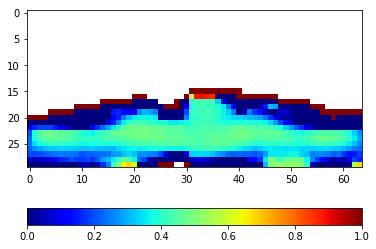

In [80]:
df1.plot_slice(df1.stats['r2'][:, :, df1._get_var_idxs('PHCLDLIQ')].mean(1).T, vmin=0, vmax=1, cmap='jet');

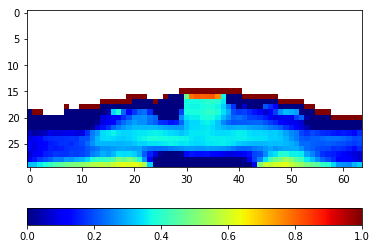

In [19]:
df2.plot_slice(df2.stats['r2'][:, :, df2._get_var_idxs('PHCLDLIQ')].mean(1).T, vmin=0, vmax=1, cmap='jet');

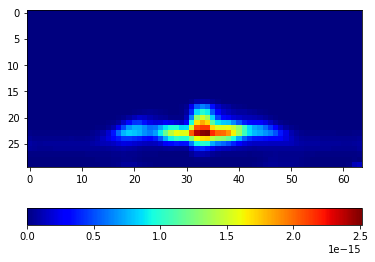

In [81]:
df1.plot_slice(df1.stats['true_var'][:, :, df1._get_var_idxs('PHCLDLIQ')].mean(1).T, cmap='jet');

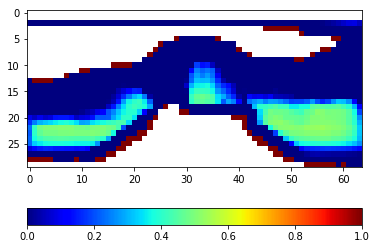

In [82]:
df1.plot_slice(df1.stats['r2'][:, :, df1._get_var_idxs('PHCLDICE')].mean(1).T, vmin=0, vmax=1, cmap='jet');

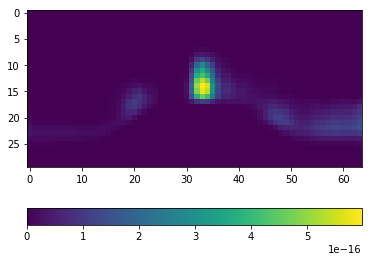

In [79]:
df1.plot_slice(df1.stats['true_var'][:, :, df1._get_var_idxs('PHCLDICE')].mean(1).T);

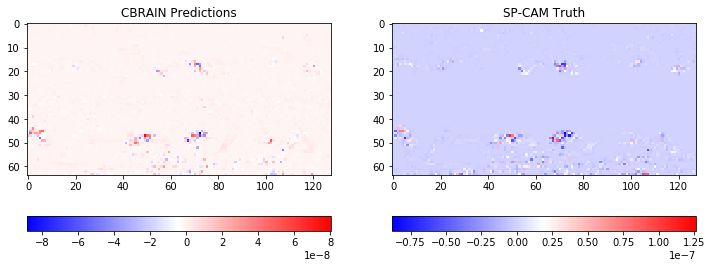

In [91]:
df1.plot_double_xy(10, 20, 'PHCLDICE', cmap='bwr');

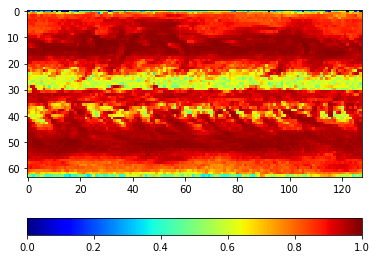

In [86]:
df1.plot_slice(np.squeeze(df1.stats['r2'][:, :, df1._get_var_idxs('TOT_PRECL')]), vmin=0, vmax=1, cmap='jet');

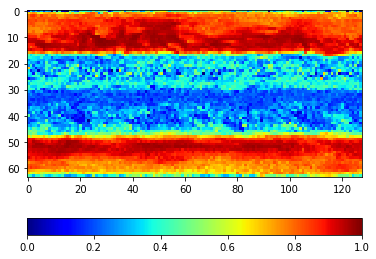

In [87]:
df1.plot_slice(np.squeeze(df1.stats['r2'][:, :, df1._get_var_idxs('TOT_PRECS')]), vmin=0, vmax=1, cmap='jet');

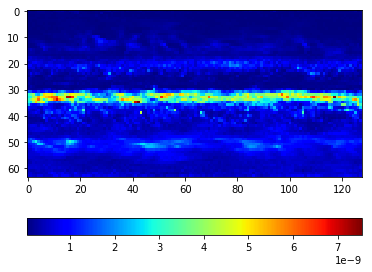

In [88]:
df1.plot_slice(np.squeeze(df1.stats['true_var'][:, :, df1._get_var_idxs('TOT_PRECS')]), cmap='jet');

In [89]:
df1.target_size

126

In [90]:
df1.k_norm['feature_names'][:].shape

(154,)

In [10]:
dg1 = get_stats('G001_fbp_engy_ess_galen_sample1_max_rs_deep', 'fbp_engy_ess_galen', norms)

100%|██████████| 2868/2868 [01:57<00:00, 24.36it/s]
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:259: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/data11/home/srasp/repositories/CBRAIN-CAM/notebooks/presentation/cbrain/model_diagnostics.py:265: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


                 bias          mse    pred_mean    true_mean  pred_sqmean  \
TPHYSTND -1.02218e-07  1.36353e-09  1.98297e-07  3.00516e-07  1.78604e-09   
PHQ        2.4903e-12  1.66058e-15  1.09236e-09  1.08987e-09  7.54365e-16   
FSDS        0.0632575      1042.27      174.271      174.207      98165.1   
PRECT    -7.11709e-12  1.47582e-15   3.1603e-08  3.16101e-08  1.22747e-14   
all               NaN          NaN          NaN          NaN          NaN   

          true_sqmean     pred_var     true_var        r2  hor_tsqmean  \
TPHYSTND  3.11906e-09  1.63927e-09   2.9723e-09  0.436321  3.11906e-09   
PHQ       2.39161e-15  6.98613e-16  2.33599e-15  -10.4251  2.39161e-15   
FSDS          99115.2      53941.4      54961.7      -inf      99115.2   
PRECT     1.36033e-14  9.98291e-15  1.13322e-14  0.691712  1.36033e-14   
all               NaN          NaN          NaN       NaN          NaN   

            hor_tmean      hor_mse     hor_tvar    hor_r2  
TPHYSTND  3.00516e-07  1.36353e-